# Analisis Exploratorio de los Datos de los Taxis de NYC

1. [Introducción](#introducción)
2. [Funciones de Descarga](#funciones-de-descarga)
3. [Carga de Datos](#carga-de-datos)
4. [Yellow Taxi](#yellow-taxi)
- 4.1 [Descripción general de los datos](EDA_TLC%20Trip%20Record%20Data.ipynb#descripción-general-de-los-datos)
- 4.2 [Análisis de Registros Nulos](EDA_TLC%20Trip%20Record%20Data.ipynb#analisís-de-registros-nulos-y-limpieza-de-datos)
- 4.3 [Análisis de Valores Atípicos](EDA_TLC%20Trip%20Record%20Data.ipynb#analisis-de-valores-atipicos)
- 4.4 [Eliminación de Registros Fuera de Rango Temporal](EDA_TLC%20Trip%20Record%20Data.ipynb#eliminación-de-registros-fuera-del-rango-temporal)
- 4.5 [Variables Yellow Taxi](#variables-yellow-taxi)
- 4.5.1 [Variables Cualitativas Yellow Taxi](EDA_TLC%20Trip%20Record%20Data.ipynb#variables-cualitativas-de-los-yellow-taxi)
- 4.5.1.1 [Algunas distribuciones cualitativas de los Yellow Taxi](EDA_TLC%20Trip%20Record%20Data.ipynb#algunas-distribuciones-cualitativas-de-los-yellow-taxi)
- 4.5.2 [Variables Cuantitativas de los Yellow Taxi](EDA_TLC%20Trip%20Record%20Data.ipynb#variables-cuantitativas-de-los-yellow-taxi)
- 4.5.2.1 [Algunas distribuciones cuantitativas de Yellow Taxi](EDA_TLC%20Trip%20Record%20Data.ipynb#algunas-distribuciones-cuantitativas-de-yellow-taxi)
5. [Green Taxi](#green-taxi)
- 5.1 [Descripción general de los datos Green Taxi](EDA_TLC%20Trip%20Record%20Data.ipynb#descripción-general-de-los-datos-green-taxi)
- 5.2 [Análisis de Valores Atípicos en Green Taxi](EDA_TLC%20Trip%20Record%20Data.ipynb#análisis-de-valores-atípicos-en-green-taxi)
- 5.3 [Variables Green Taxi](EDA_TLC%20Trip%20Record%20Data.ipynb#variables-green-taxi)
- 5.3.1 [Variables Cualitativas Green Taxi](EDA_TLC%20Trip%20Record%20Data.ipynb#variables-cualitativas-green-taxi)
- 5.3.1.1 [Algunas distribuciones cualitativas de los Green Taxi](EDA_TLC%20Trip%20Record%20Data.ipynb#algunas-distribuciones-cualitativas-de-los-green-taxi)
- 5.3.2 [Variables Cuantitativas de los Green Taxi](EDA_TLC%20Trip%20Record%20Data.ipynb#variables-cuantitativas-green-taxi)
- 5.3.2.1 [Algunas distribuciones cuantitativas de Green Taxi](EDA_TLC%20Trip%20Record%20Data.ipynb#algunas-distribuciones-cuantitativas-de-green-taxi)

# Introducción
El análisis de datos de los taxis en la Ciudad de Nueva York se encuentra dividido en dos grupos de datos, el primero en analizarse en este documento es el que describe a los `Yellow Taxi` y por otro lado se realiza una revisión del conjunto de datos que registra el comportamiento de los `Green Taxis` los cuales ofrecen una visión detallada y actualizada del sector. El presente trabajo se enfoca en el periodo temporal más reciente, de _diciembre de 2023 a febrero de 2024_, se asegura que la información sea lo más relevante posible para las tendencias actuales. La presencia de registros nulos en los datos de `Yellow Taxi` es relativamente baja en comparación con el volumen total, lo que indica una alta integridad de los datos. Por otro lado, la decisión de retener los registros con valores nulos en el conjunto de datos de `Green Taxi` sugiere que, aunque incompletos, estos registros contienen insights significativos que pueden contribuir al análisis general. Este enfoque equilibrado entre la calidad y la completitud de los datos es crucial para obtener una comprensión profunda del comportamiento de los taxis y su interacción con el entorno urbano de NYC.

In [1]:
# Cargando Modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
# yellow_taxi = pd.read_csv('../../Data/yellow_taxi_clean.csv')  # Ejecutar solo cuando sea necesario cargar los datos limpios

# Funciones de descarga
Función `range_data` extrae un rango de archivos Parquet y los carga como DataFrames. Los parametros solicitados son:
- `url_trim` Porción de la url que se mantiene invariable
- `start_m` Mes del intervalo inferior
- `start_y` Año del intervalo inferior
- `end_m` Mes del intervalo superior
- `end_y` Año del intervalo superior



**Esta función esta omitiendo un mes de la descarga, es necesario realizar una revision de ella para su implementación.**

In [2]:
def downloaddf(url_trim:str,month:int,year:int):
    if len (str(int(month)))==1:
        month='0'+str(month)
    return  pd.read_parquet(url_trim+str(year)+'-'+str(month)+'.parquet')

def range_data(url_trim:str,start_m:int, start_y:int, end_m:int, end_y:int):
    if end_y - start_y < 0:
        return 'Error:  End Year is smaller than Start Year'
    elif end_y ==  start_y and end_m < start_m:
        return 'Error:  End Month is smaller than or equal to Start Month'
    elif start_m > 12 or end_m > 12:
        return 'Error: End Month or  Start Month is larger than 12'
    elif end_y ==  start_y and end_m == start_m:
        return downloaddf(url_trim,start_m,start_y)
    elif end_y == start_y:
        df1 =downloaddf(url_trim,start_m,start_y)
        for i in range(start_m + 1,end_m + 1):
            df2 =downloaddf(url_trim,i,start_y)
            df1 = pd.concat([df1,df2],ignore_index=True)
            del df2
        return df1
    elif  end_y > start_y:
        df1 =downloaddf(url_trim,start_m,start_y)
        for j in range(start_y ,end_y + 1):
            for k in range(start_m ,13):
                if  j==end_y and  k > end_m :break
                df2 =downloaddf(url_trim,k,j)
                if not df1.equals(df2):
                    df1 = pd.concat([df1,df2],ignore_index=True)
                del df2
            start_m  = 1
        return df1

# Carga de datos
Carga del conjunto de datos para `Yellow Taxi` comprendidos entre Diciembre del 2023 a Febrero del 2024 (Últimos tres meses)

In [3]:
url_trim = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_20'
yellow_taxi = range_data(url_trim,12,23,2,24)

Descarga alternativa del datos

In [4]:
# df1 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-12.parquet')
# df2 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')
# df3 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet')
# yellow_taxi = pd.concat([df1,df2,df3],ignore_index=True)

Carga de datos de `Green Taxi`

In [5]:
url_trim = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_20'
green_taxi = range_data(url_trim,12,23,2,24)

Carga alternativa de datos de `Green Taxi`

In [6]:
# df1 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-12.parquet')
# df2 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet')
# df3 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet')
# green_taxi = pd.concat([df1,df2,df3],ignore_index=True)

Identificadores de zona de NYC

In [7]:
url_zonas = 'https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv'
zonas = pd.read_csv(url_zonas)

# Yellow Taxi
## Descripción general de los datos

El conjunto de datos utilizado para el análisis exploratorio de datos (EDA) de los taxis amarillos abarca los últimos **3 meses disponibles** a la fecha de realización (de **diciembre de 2023 a febrero de 2024**). Este intervalo temporal contiene poco más de **9 millones de registros** de los cuales se encontraron cerca de **506 mil registros nulos** lo cual **representa el 5.41% de los datos** analizados.

In [8]:
yellow_taxi.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9348717 entries, 0 to 9348716
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               9348717 non-null  int32         
 1   tpep_pickup_datetime   9348717 non-null  datetime64[us]
 2   tpep_dropoff_datetime  9348717 non-null  datetime64[us]
 3   passenger_count        8842942 non-null  float64       
 4   trip_distance          9348717 non-null  float64       
 5   RatecodeID             8842942 non-null  float64       
 6   store_and_fwd_flag     8842942 non-null  object        
 7   PULocationID           9348717 non-null  int32         
 8   DOLocationID           9348717 non-null  int32         
 9   payment_type           9348717 non-null  int64         
 10  fare_amount            9348717 non-null  float64       
 11  extra                  9348717 non-null  float64       
 12  mta_tax                93487

In [9]:
nulos = yellow_taxi[yellow_taxi['passenger_count'].isna() == True]['VendorID'].count()
yellow_taxi[yellow_taxi['passenger_count'].isna() == True].count()

VendorID                 505775
tpep_pickup_datetime     505775
tpep_dropoff_datetime    505775
passenger_count               0
trip_distance            505775
RatecodeID                    0
store_and_fwd_flag            0
PULocationID             505775
DOLocationID             505775
payment_type             505775
fare_amount              505775
extra                    505775
mta_tax                  505775
tip_amount               505775
tolls_amount             505775
improvement_surcharge    505775
total_amount             505775
congestion_surcharge          0
Airport_fee                   0
dtype: int64

## Analisís de registros nulos y limpieza de datos

In [10]:
print(f"Se tienen un total de {yellow_taxi['VendorID'].count()} de los cuales {nulos} son registros nulos, lo cual representa un {round(nulos * 100/ yellow_taxi['VendorID'].count(),2)}% de los datos")

Se tienen un total de 9348717 de los cuales 505775 son registros nulos, lo cual representa un 5.41% de los datos


Despues de eliminar los registros nulos nos **quedan alrededor de 8.8 millones** de registros

In [11]:
yellow_taxi = yellow_taxi.dropna()
print(f"Quedan {yellow_taxi['VendorID'].count()} registros")

Quedan 8842942 registros


## Analisis de valores atipicos
En esta primera inspección, se pueden visualizar registros que contienen valores atípicos en las siguientes variables:

- `tpep_pickup_datetime`
- `tpep_dropoff_datetime`
- `trip_distance`
- `extra`
- `mta_tax`
- `tip_amount`
- `tolls_amount`
- `total_amount`

Estos valores atípicos pueden afectar el análisis y deben ser considerados al procesar los datos. Es importante investigar más a fondo para comprender la naturaleza de estos registros y decidir cómo manejarlos en el contexto del análisis exploratorio de datos.

In [12]:
yellow_taxi.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,8.842942e+06,8842942,8842942,8.842942e+06,8.842942e+06,8.842942e+06,8.842942e+06,8.842942e+06,8.842942e+06,8.842942e+06,8.842942e+06,8.842942e+06,8.842942e+06,8.842942e+06,8.842942e+06,8.842942e+06,8.842942e+06,8.842942e+06
mean,1.757060e+00,2024-01-14 14:38:42.655637,2024-01-14 14:55:20.555183,1.359922e+00,3.337742e+00,1.984252e+00,1.658360e+02,1.649052e+02,1.222013e+00,1.856954e+01,1.535385e+00,4.824741e-01,3.501427e+00,5.482924e-01,9.744790e-01,2.744127e+01,2.264431e+00,1.358217e-01
min,1.000000e+00,2002-12-31 22:16:54,2002-12-31 23:05:41,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.087300e+03,-7.500000e+00,-5.000000e-01,-1.400000e+02,-8.000000e+01,-1.000000e+00,-1.094050e+03,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2023-12-19 21:42:44.250000,2023-12-19 21:56:46,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.548000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2024-01-14 23:01:15.500000,2024-01-14 23:14:53.500000,1.000000e+00,1.680000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.050000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2024-02-07 12:28:45,2024-02-07 12:47:42.750000,1.000000e+00,3.110000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.120000e+01,2.500000e+00,5.000000e-01,4.340000e+00,0.000000e+00,1.000000e+00,2.970000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2024-03-01 00:01:37,2024-03-01 23:24:42,9.000000e+00,1.617261e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,5.000000e+03,5.168000e+01,5.750000e+00,4.174000e+03,1.613800e+02,1.000000e+00,5.000000e+03,2.500000e+00,1.750000e+00
std,4.288594e-01,NaN,NaN,8.679405e-01,8.485820e+01,9.396248e+00,6.350249e+01,6.932214e+01,5.353514e-01,1.884785e+01,1.820353e+00,1.207479e-01,4.231450e+00,2.168942e+00,2.236907e-01,2.356329e+01,8.145729e-01,4.789160e-01


## Eliminación de registros fuera del rango temporal
Se han identificado 10 registros con fechas de inicio de viaje (`tpep_pickup_datetime`) que están fuera del rango de tiempo establecido. Por lo tanto, se eliminarán estos datos por encontrarse fuera del periodo temporal definido para el análisis.

In [13]:
yellow_taxi[yellow_taxi['tpep_pickup_datetime'].dt.year < 2023]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
1128759,2,2002-12-31 22:16:54,2003-01-01 15:02:08,1.0,3.25,1.0,N,132,10,1,14.9,1.75,0.5,3.63,0.00,1.0,21.78,0.0,0.00
2531205,2,2002-12-31 23:03:18,2003-01-01 21:09:44,1.0,28.19,2.0,N,132,13,1,70.0,0.00,0.5,16.54,6.94,1.0,99.23,2.5,1.75
2601397,2,2009-01-01 00:02:41,2009-01-01 17:43:28,1.0,1.37,1.0,N,230,142,1,10.7,0.00,0.5,1.47,0.00,1.0,16.17,2.5,0.00
3387482,2,2009-01-01 23:58:40,2009-01-02 00:01:40,1.0,0.46,1.0,N,137,264,2,4.4,3.50,0.5,0.00,0.00,1.0,9.40,0.0,0.00
3429686,2,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,N,170,170,3,-6.5,0.00,-0.5,0.00,0.00,-1.0,-10.50,-2.5,0.00
3429687,2,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,N,170,170,3,6.5,0.00,0.5,0.00,0.00,1.0,10.50,2.5,0.00
4606736,2,2009-01-01 23:30:39,2009-01-02 00:01:39,1.0,10.99,1.0,N,237,264,2,45.0,3.50,0.5,0.00,0.00,1.0,50.00,0.0,0.00
5934623,2,2009-01-01 00:24:09,2009-01-01 01:13:00,2.0,10.88,1.0,N,138,264,2,50.6,9.25,0.5,0.00,6.94,1.0,68.29,0.0,0.00
6522474,2,2008-12-31 22:52:49,2008-12-31 23:04:09,1.0,1.62,1.0,N,141,211,1,11.4,2.50,0.5,2.00,0.00,1.0,19.90,2.5,0.00
7240044,2,2009-01-01 00:02:13,2009-01-01 00:48:28,1.0,0.57,1.0,N,79,148,1,9.3,1.00,0.5,2.86,0.00,1.0,17.16,2.5,0.00


Eliminando registros fuera del rango temporal

In [14]:
yellow_taxi = yellow_taxi[yellow_taxi['tpep_pickup_datetime'].dt.year >= 2023]

El rango temporal es de 92 días (Aproximadamente 3 meses)

In [15]:
print(yellow_taxi['tpep_pickup_datetime'].dt.date.max() - yellow_taxi['tpep_pickup_datetime'].dt.date.min())

92 days, 0:00:00


## Variables Yellow Taxi
### Variables cualitativas de los Yellow Taxi

1. `VendorID`. Identificador del proveedor del Taxicab Technology Service Provider (TPEP), el cual puede presentar solo dos ID´s:
- 1= Creative Mobile Technologies, LLC
- 2= VeriFone Inc.

2. `RateCodeID`. Identificador de tarifa vigente al finalizar el viaje. Puede tomar los siguientes valores:
- 1=Tarifa estándar
- 2=JFK
- 3=Newark
- 4=Nassau o Westchester
- 5=Tarifa negociada
- 6=Tarifa grupal

3. `Store_and_fwd_flag`. Esta variable indica si el registro se almaceno en el vehiculo para posteriormente enviarse al servidor. Debido a conectividad. Puede tomar los Valores (Y= Almacenado y posterior envio, N= No almacenado, se envio al servidor)
4. `PULocationID`. Zona dónde se inicio el Taximetro, las zonas se segmentan con valores enteros que van del 1 al 265, (consulte el DataFrame `zonas`)

5. `DOLocationID`. Zona dónde se finalizo el Taximetro (Consulte DataFrame Zonas)

6. `payment_type`. Tipo de pago, los valores pueden ser:
- 1= Tarjeta de crédito
- 2= Efectivo
- 3= Sin cargo
- 4= Disputa
- 5= Desconocido
- 6= Viaje anulado

## Algunas distribuciones cualitativas de los Yellow Taxi
El proveedor de TPEP con mayor presencia (`VendorID`) es VeriFone Inc. ya que el 75% de los registros provienen de ellos

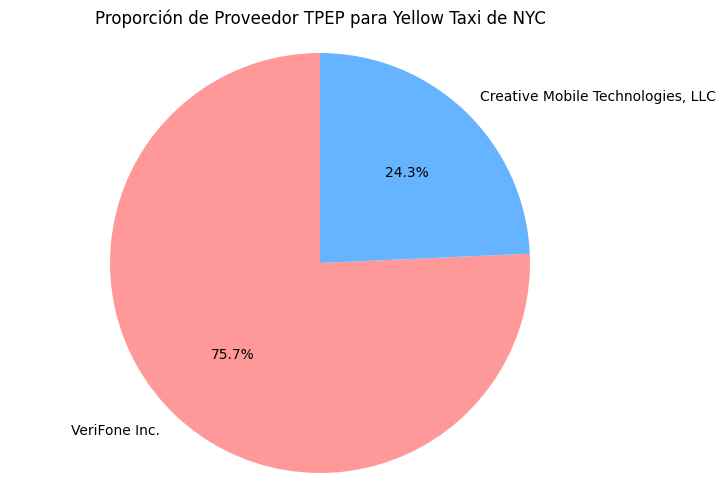

In [16]:
# Datos
vendor = {1:'Creative Mobile Technologies, LLC', 2:'VeriFone Inc.'}
vendor_counts = list(yellow_taxi['VendorID'].value_counts())
labels = ['VeriFone Inc.', 'Creative Mobile Technologies, LLC']
colors = ['#FF9999', '#66B3FF']

# Crear la gráfica circular
plt.figure(figsize=(8, 6))
plt.pie(vendor_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Proveedor TPEP para Yellow Taxi de NYC')
plt.axis('equal')  # Aspecto igual para que sea un círculo

# Mostrar la gráfica
plt.show()


La tarifa identificada con el número `99`, que no figura en la documentación oficial, resalta por ser la **tercera más frecuente** en el uso durante los últimos tres meses. Es esencial prestar atención a esta tarifa debido a su inesperada alta incidencia.

In [17]:
yellow_taxi['RatecodeID'].value_counts()

RatecodeID
1.0     8345859
2.0      307115
99.0      82021
5.0       61686
3.0       27015
4.0       19222
6.0          14
Name: count, dtype: int64

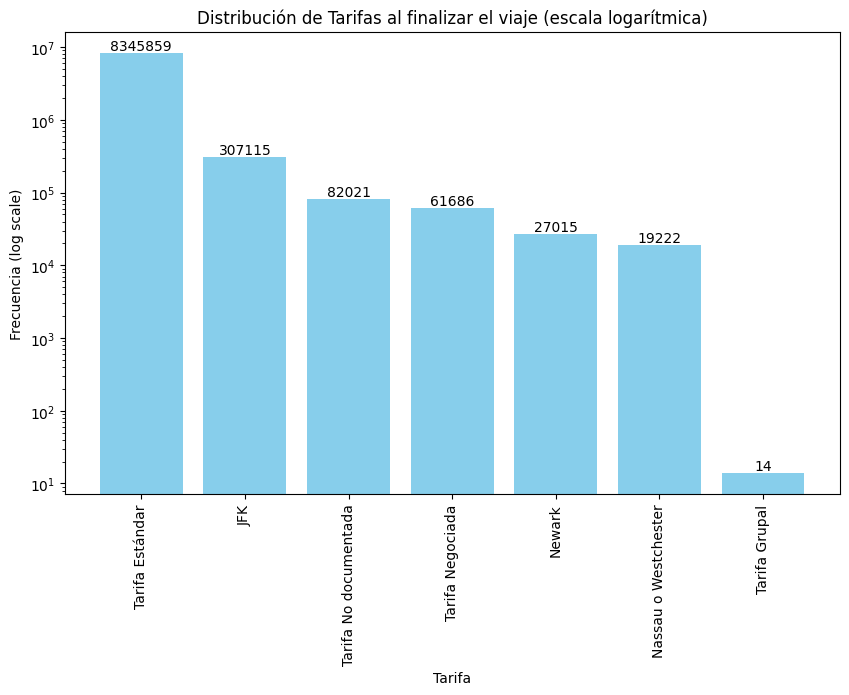

In [18]:
ratecode_counts = yellow_taxi['RatecodeID'].value_counts()
RCID = {1:'Tarifa Estándar',2:'JFK',3:'Newark',4:'Nassau o Westchester',5:'Tarifa Negociada',6:'Tarifa Grupal',99:'Tarifa No documentada'}
# Ahora, crearemos una lista de etiquetas basadas en el diccionario RCID para las barras del histograma.
labels = [RCID[id] if id in RCID else 'Other' for id in ratecode_counts.index]

# Crear el histograma con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))
plt.bar(labels, ratecode_counts.values, color='skyblue')
plt.yscale('log')  # Escala logarítmica en el eje y

# Añadir título y etiquetas
plt.title('Distribución de Tarifas al finalizar el viaje (escala logarítmica)')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia (log scale)')
plt.xticks(rotation = 90)

# Mostrar las etiquetas en las barras
for i, value in enumerate(ratecode_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostrar el histograma
plt.show()


La información indica que la gran mayoría de los datos de los viajes en taxi se transmiten justo al finalizar el trayecto, lo cual sugiere que hay una capacidad para realizar un seguimiento en tiempo real. Sin embargo, un pequeño porcentaje, específicamente el **0.4%**, se guarda para enviar más tarde, lo que podría implicar ligeras demoras en la recepción de esos datos. Este patrón de envío de datos refuerza la viabilidad de implementar un sistema de monitoreo en tiempo real para la mayoría de los servicios de taxi.

In [19]:
porcentaje = list(yellow_taxi['store_and_fwd_flag'].value_counts())[1]/(list(yellow_taxi['store_and_fwd_flag'].value_counts())[0]+list(yellow_taxi['store_and_fwd_flag'].value_counts())[1])
print(f"La proporcion de registros almacenados y enviados posteriormente es del {round(porcentaje*100,2)}%")

La proporcion de registros almacenados y enviados posteriormente es del 0.4%


Es interesante observar que la mayoría de los viajes en taxi comienzan en **Manhattan**, **Queens** y **Brooklyn**, lo que no es sorprendente dado que son áreas muy transitadas en la ciudad de Nueva York. Sin embargo, también es relevante notar que existe un volumen significativo de viajes en los que **se desconoce el origen** del viaje. Esto podría deberse a diversas razones, como errores en la recopilación de datos o la falta de información precisa en algunos registros.

In [20]:
# Creando DF que relaciona Zona, Borough, Zona de Servicio y el número de servicios.
ZI = {'LocationID':list(yellow_taxi['PULocationID'].value_counts().index),
      'Número de servicios':list(yellow_taxi['PULocationID'].value_counts())}
ZonaInicio = pd.DataFrame(ZI)
ZonaInicio = pd.merge(ZonaInicio,zonas,on='LocationID', how='inner')

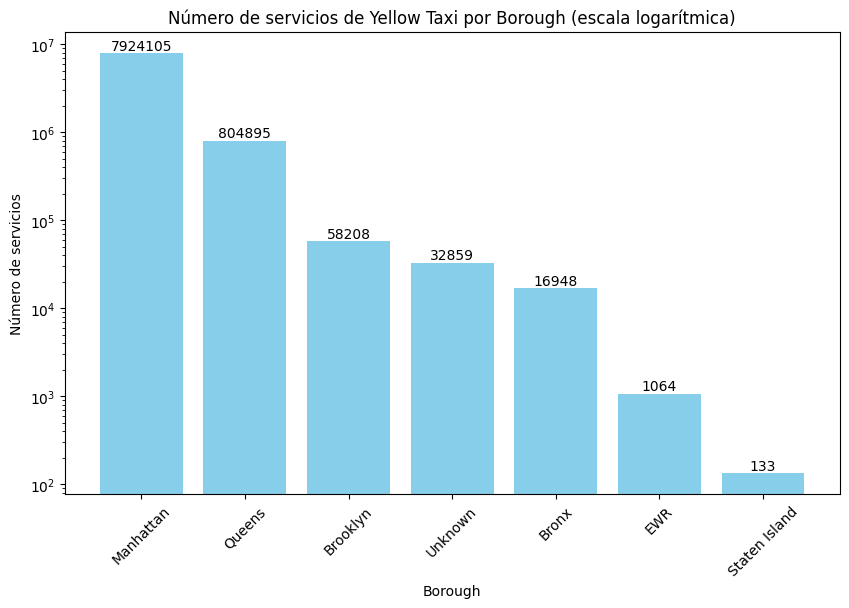

In [21]:
borough_services = ZonaInicio.groupby('Borough')['Número de servicios'].sum().reset_index()

# Ordenar los datos para una mejor visualización
borough_services_sorted = borough_services.sort_values('Número de servicios', ascending=False)

# Crear el histograma con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))
plt.bar(borough_services_sorted['Borough'], borough_services_sorted['Número de servicios'], color='skyblue')
plt.yscale('log')  # Escala logarítmica en el eje y

# Mostrar las etiquetas en las barras
for i, value in enumerate(borough_services_sorted['Número de servicios'].values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Número de servicios de Yellow Taxi por Borough (escala logarítmica)')
plt.xlabel('Borough')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el histograma
plt.show()


Es notable que los **Yellow Taxis** inician la mayoría de sus servicios en la **Yellow Zone**, con aproximadamente **7.7 millones de viajes**, lo que indica una alta concentración de actividad en esta área. Por otro lado, los viajes que comienzan en los **aeropuertos** representan alrededor de **700,000**, y en la **Boro Zone**, solo aproximadamente **325,000**. Esto muestra una distribución desigual de los servicios de taxi, con una clara preferencia por la Yellow Zone, probablemente debido a la alta demanda y la facilidad de acceso a pasajeros en esa área. La menor cantidad de servicios que se originan en los aeropuertos y en la Boro Zone podría reflejar una menor demanda y la presencia de otras opciones de transporte en esas zonas.

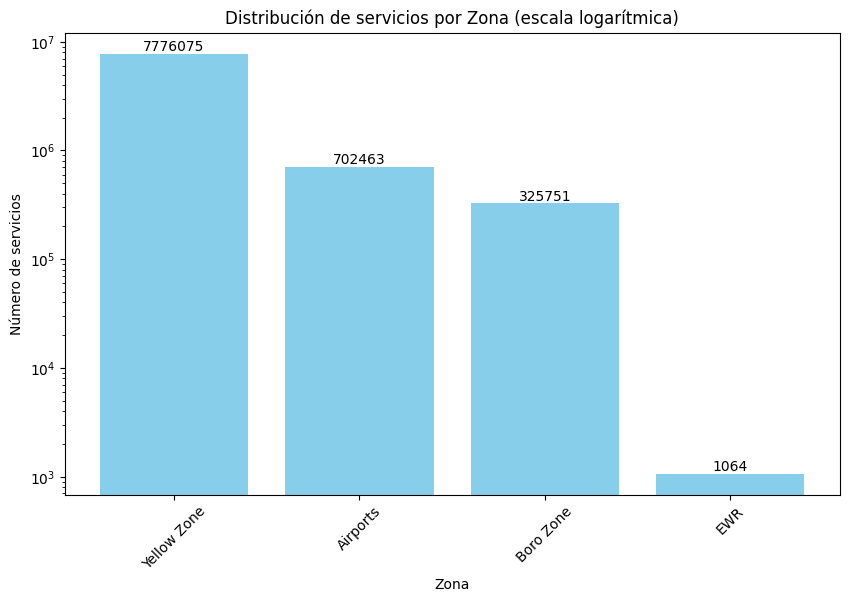

In [22]:
Zona_servicio = ZonaInicio.groupby('service_zone')['Número de servicios'].sum().reset_index()

# Ordenar los datos para una mejor visualización
Zona_servicio_sorted = Zona_servicio.sort_values('Número de servicios', ascending=False)

# Crear el histograma con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))
plt.bar(Zona_servicio_sorted['service_zone'], Zona_servicio_sorted['Número de servicios'], color='skyblue')
plt.yscale('log')  # Escala logarítmica en el eje y

# Mostrar las etiquetas en las barras
for i, value in enumerate(Zona_servicio_sorted['Número de servicios'].values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Distribución de servicios por Zona (escala logarítmica)')
plt.xlabel('Zona')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el histograma
plt.show()


La siguiente imagen muestra las 10 zonas con más viajes 

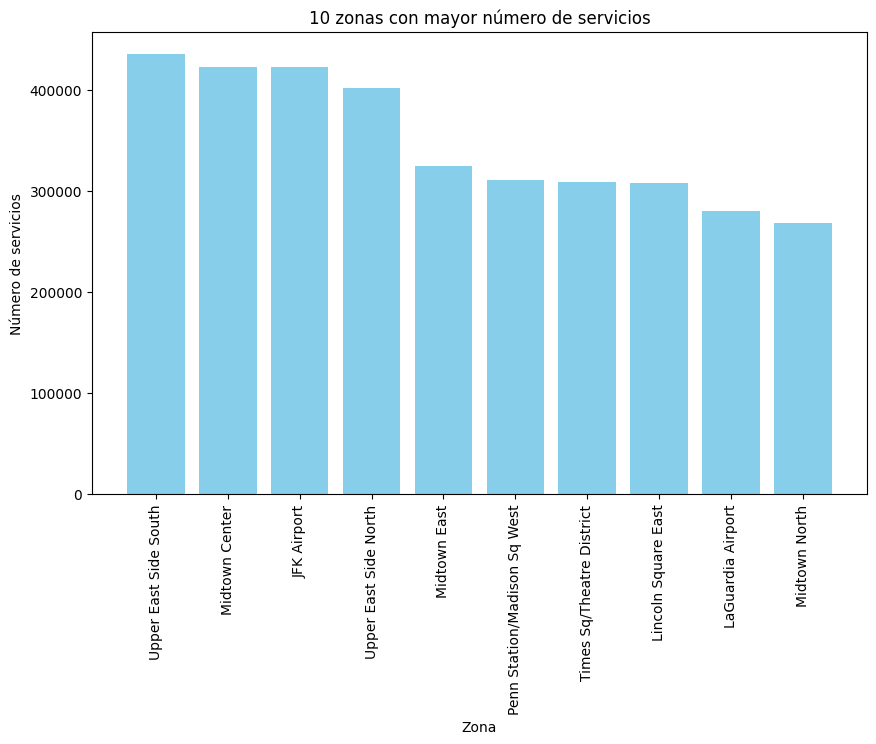

In [23]:
# Cantidad de zonas a mostrar en el gráfico
n = 10
zona_sorted = ZonaInicio[['Zone', 'Número de servicios']].sort_values(by='Número de servicios', ascending=False).head(n)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(zona_sorted['Zone'].astype(str), zona_sorted['Número de servicios'], color='skyblue')  # Convertir a str

# Añadir título y etiquetas
plt.title(f'{n} zonas con mayor número de servicios')
plt.xlabel('Zona')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Mostrar el histograma
plt.show()


Para identificar las rutas más transitadas, se crea la variable `trip_outside_zone`. Esta variable es **TRUE** cuando el destino del viaje es distinto a su punto de partida.

In [24]:
yellow_taxi['trip_outside_zone'] = yellow_taxi['PULocationID'] != yellow_taxi['DOLocationID']

Creando variable `route` la cual define la zona del punto de partida y destino de cada viaje

In [25]:
# Esta celda demora bastante en ejecutare :( Si es localmente :`(, ya que filtra n veces el DF zonas y devuelve la zona al aplicarse el apply 
# en el df yellow taxi.
def idzone2zone(id:int):
    try:
        filtro = zonas[zonas['LocationID'] == id].reset_index()
        return filtro['Zone'].loc[0]
    except:
        return np.nan

yellow_taxi['route'] = yellow_taxi['PULocationID'].apply(idzone2zone) +' --> '+ yellow_taxi['DOLocationID'].apply(idzone2zone)

In [26]:
yellow_taxi.sample()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_outside_zone,route
3853017,1,2024-01-06 16:09:00,2024-01-06 16:18:03,1.0,1.1,1.0,N,229,163,1,...,2.5,0.5,1.0,0.0,1.0,13.6,2.5,0.0,True,Sutton Place/Turtle Bay North --> Midtown North


El gráfico titulado "20 rutas más solicitadas en NYC" muestra las rutas de taxis amarillos en Nueva York que tienen la mayor demanda.

- **Ruta Superior**: La ruta más popular es de **Upper East Side South a Upper East Side North**, lo que indica una alta demanda de viajes dentro de esta área.
- **Rutas Comunes**: Varias rutas conectan **Upper East Side** con **Midtown** y **Lincoln Square**, lo que refleja patrones comunes de desplazamiento.
- **Demanda de Servicios**: Las barras representan el número de servicios, con la ruta más solicitada alcanzando hasta **40,000** servicios.
- **Planificación Urbana**: Este análisis de datos es útil para la **planificación del tráfico** y la **gestión urbana**, ayudando a entender los patrones de movilidad y optimizar los servicios de transporte.

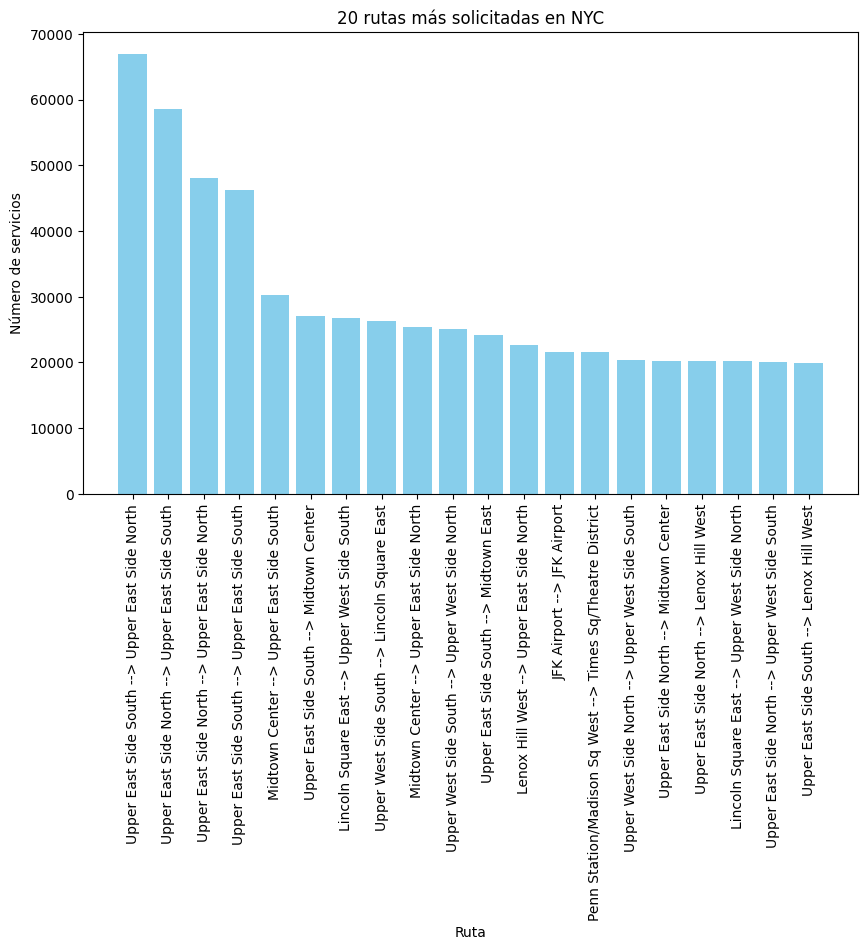

In [27]:
# Cantidad de rutas a mostrar en el gráfico
n = 20
rutas = yellow_taxi.groupby('route')['route'].count().sort_values(ascending=False).head(n)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(list(rutas.index), list(rutas), color='skyblue')

# Añadir título y etiquetas
plt.title(f'{n} rutas más solicitadas en NYC')
plt.xlabel('Ruta')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Mostrar el histograma
plt.show()

El gráfico titulado "Métodos de Pago en Yellow Taxis" muestra las preferencias de pago de los clientes que utilizan taxis:

- **Predominio de Tarjetas**: La **tarjeta de crédito** es el método de pago más utilizado, con una frecuencia de **7.2 millones**.
- **Efectivo Sigue Vigente**: El pago en **efectivo** es el segundo más común, alrededor de los **1.4 millones** transacciones.
- **Menos Disputas y Sin Cargo**: Las categorías de **disputa** y **sin cargo** tienen frecuencias mucho menores, con **~150 mil** y **60 mil** respectivamente.
- **Tendencias de Pago**: Este gráfico muestra una tendencia de pago con tarjeta de crédito.

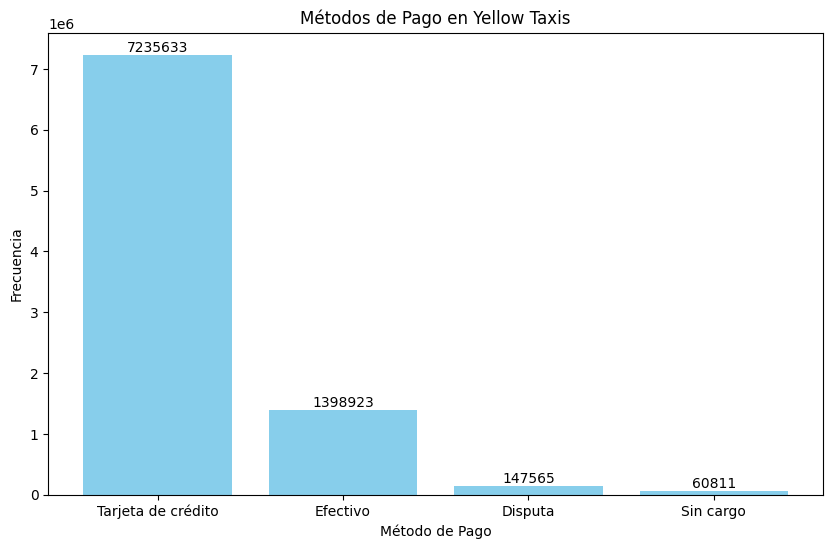

In [28]:
payment_counts = yellow_taxi['payment_type'].value_counts()
payment_method = {1:'Tarjeta de crédito',2:'Efectivo',3:'Sin cargo',4:'Disputa',5:'Desconocido',6:'Viaje anulado'}

# Crear una lista de nombres de métodos de pago basada en el diccionario 'payment_method'
payment_names = [payment_method[payment_id] if payment_id in payment_method else 'Desconocido'
                 for payment_id in payment_counts.index]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(payment_names, payment_counts.values, color='skyblue')

# Mostrar las etiquetas en las barras
for i, value in enumerate(payment_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Añadir título y etiquetas a los ejes
plt.title('Métodos de Pago en Yellow Taxis')
plt.xlabel('Método de Pago')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


## Variables Cuantitativas de los Yellow Taxi

1. `tpep_pickup_datetime`. Fecha y hora en la que se activo el taximetro
2. `tpep_dropoff_datetime`. Fecha y hora en la que se termino el servico
3. `passenger_count`. Número de pasajeros. (Valor ingresado por el controlador). Variable discreta que van desde 1 a 9 pasajeros
4. `trip_distance`. Distancia registrada por el taxímetro. Variable continua medida en millas
5. `fare_amount`. Tarifa de tiempo y distancia calculada por el taxímetro
6. `extra`. Extras y recargos, se incluyen unicamente cargos por horas pico y noche de $0.50 y $1 respectivamente
7. `mta_tax`. Impuesto MTA de $0.50 que se activa automáticamente en función de la tarifa medida en uso.
8. `tip_amount`. Propina, unicamente se incluyen cuando el método de pago es con tarjeta de crédito. Propinas en efectivo no incluidas
9. `tolls_amount`. Importe total de todos los peajes pagados en viaje.
10. `improvement_surcharge`. Cargo por mejora de $0.30
11. `total_amount`. Importe total cobrado. No se incluyen propinas en efectivo.
12. `congestion_surcharge`. Recargo total por congestión del Estado de Nueva York.
13. `Airport_fee`. $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy

## Algunas distribuciones cuantitativas de Yellow Taxi
El gráfico muestra la distribución de servicios de Yellow Taxi en los meses de diciembre de 2023, enero de 2024 y febrero de 2024.  

- **Diciembre 2023**: Este mes presenta diferencia de aproximadamente **400k** servicios con respecto a los meses de enero y febrero.
- **Enero 2024**: Se observa un decremento significativo, aproximadamente de **400k** servicios.
- **Febrero 2024**: La cantidad de servicios disminuye nuevamente a **2557** servicios, lo cual podria deberse a que este mes tiene una menor cantidad de días.

Este patrón sugiere que hubo un pico en la demanda de servicios de taxi durante diciembre de 2023, lo que podría estar relacionado con factores estacionales o eventos específicos durante ese mes. La disminución en Enero y febrero podría indicar una normalización de la demanda.

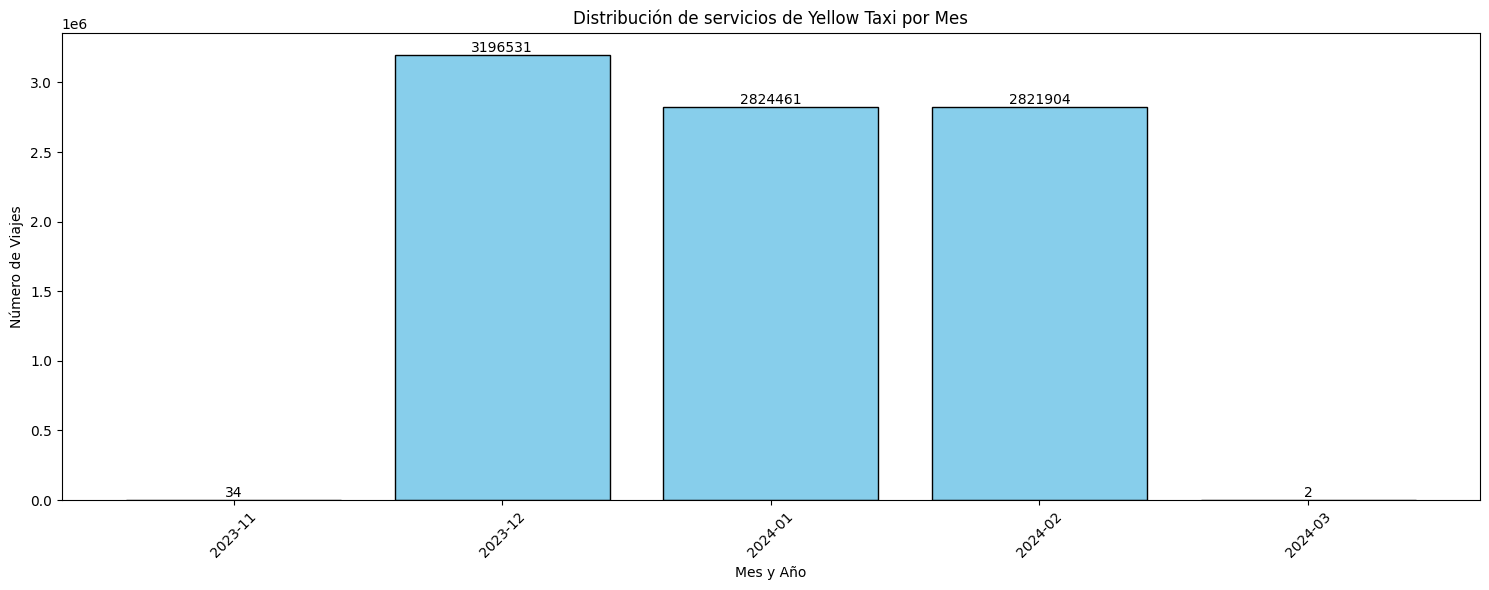

In [29]:
# Convertir la columna 'tpep_pickup_datetime' a tipo datetime
yellow_taxi['tpep_pickup_datetime'] = pd.to_datetime(yellow_taxi['tpep_pickup_datetime'])

# Extraer el mes y el año de la fecha de recogida
yellow_taxi['pickup_month'] = yellow_taxi['tpep_pickup_datetime'].dt.strftime('%Y-%m')

# Contar la cantidad de recogidas por cada mes y año
monthly_pickups = yellow_taxi['pickup_month'].value_counts().sort_index()

# Crear el histograma
plt.figure(figsize=(15, 6))
plt.bar(monthly_pickups.index, monthly_pickups.values, color='skyblue', edgecolor='black')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de servicios de Yellow Taxi por Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45) # Rotar las etiquetas para mejor visualización
# plt.yscale('log')  # Escala logarítmica en el eje y

# Mostrar las etiquetas en las barras
for i, value in enumerate(monthly_pickups.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostrar el histograma
plt.tight_layout() # Ajustar la disposición para evitar la superposición de etiquetas
plt.show()


Es importante mencionar que se localizaron inconsistencia con 45 registros que presentan viajes con una duración mayor o igual a 1 día. Lo cual podria deberse a una error del sistema o por algun error humano. Todos los registros son provenientes de  `VeriFone Inc`.

De esos registros puede observarse que el de menor duración es de 1 día y el de mayor duración fue de 6 días.

In [30]:
d = yellow_taxi[(yellow_taxi['tpep_dropoff_datetime'] - yellow_taxi['tpep_pickup_datetime']) >= pd.Timedelta(days=1)]
d['duracion'] = d['tpep_dropoff_datetime'] - d['tpep_pickup_datetime']
print(f"Se indentifican {d['Airport_fee'].count()} registros que tienen una duración mayor o igual a 1 día. Todos ellos provenientes del proveedor {vendor[d['VendorID'].unique()[0]]}")
print(f"De estos registros anomalos puede verse que el de menor duración es de {d['duracion'].min()} y el de mayor duración es de {d['duracion'].max()} ")

Se indentifican 45 registros que tienen una duración mayor o igual a 1 día. Todos ellos provenientes del proveedor VeriFone Inc.
De estos registros anomalos puede verse que el de menor duración es de 1 days 00:06:05 y el de mayor duración es de 6 days 13:35:24 


C:\Users\stdio\AppData\Local\Temp\ipykernel_6024\3814628818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['duracion'] = d['tpep_dropoff_datetime'] - d['tpep_pickup_datetime']


In [31]:
yellow_taxi['Duration'] = yellow_taxi['tpep_dropoff_datetime'] - yellow_taxi['tpep_pickup_datetime']
yellow_taxi['Duration'] = yellow_taxi['Duration'].apply(lambda x: int(x.total_seconds() // 60))
statistics = yellow_taxi['Duration'].describe()
IQR = statistics['75%'] - statistics['25%']
RI = statistics['25%'] - 1.5 * IQR       # RAngo inferior
if RI < 0:
    RI = 0
RS = statistics['75%'] + 1.5 * IQR       # Rango superior
rango = list(range(int(round(RI,0)), int(round(RS,0)) + 1, 5))
yellow_taxi['Duration_range'] = pd.cut(yellow_taxi['Duration'], bins=rango)
print(f"La variable 'total_amount' tiene valores atipicos de acuerdo a la siguiente información: \nMedia {statistics['mean']} \nDesviacion estandar {statistics['std']}\nValor Máximo {statistics['max']} \nValor mínimo {statistics['min']}")
print(RI , RS)

La variable 'total_amount' tiene valores atipicos de acuerdo a la siguiente información: 
Media 16.14256244422099 
Desviacion estandar 37.07946302157991
Valor Máximo 9455.0 
Valor mínimo -53.0
0 37.0


La mayoria de los servicios de Yellow Taxi son trayectos con una duración menor a 20 minutos, siendo los mas frecuentes aquellos que oscilan entre los 5 y 10 minutos.

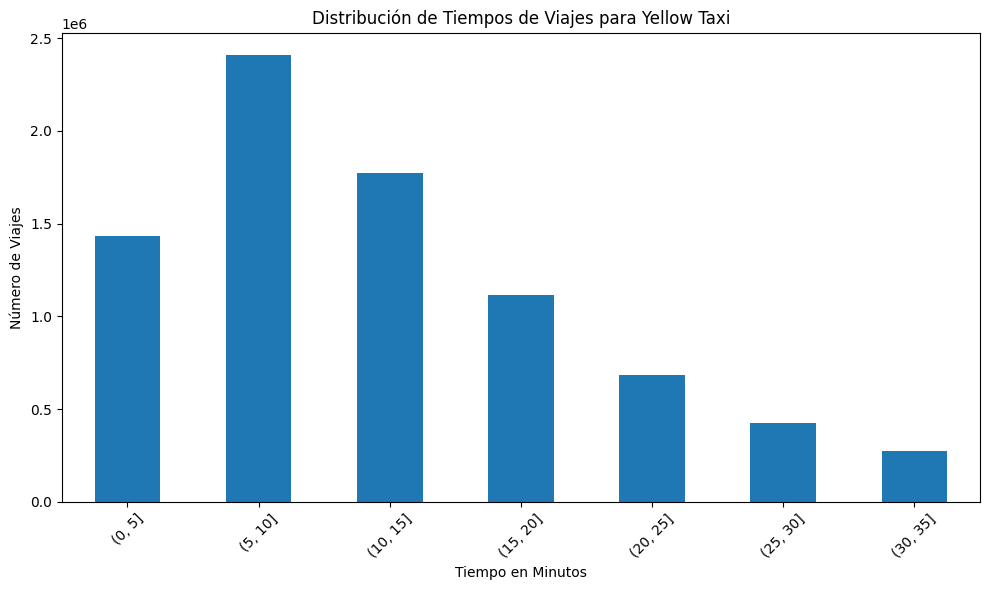

In [32]:
duration_counts = yellow_taxi['Duration_range'].value_counts().sort_index()

# Ahora creamos la gráfica de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura a tus necesidades
duration_counts.plot(kind='bar')  # Crea una gráfica de barras
plt.title('Distribución de Tiempos de Viajes para Yellow Taxi')  # Título de la gráfica
plt.xlabel('Tiempo en Minutos')  # Etiqueta para el eje X
plt.ylabel('Número de Viajes')  # Etiqueta para el eje Y
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor visualización
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()  # Muestra la gráfica


El gráfico muestra la **distribución de pasajeros** en viajes de taxis amarillos. La mayoría de los viajes son de **un solo pasajero**, con una frecuencia de más de seis millones. Los viajes con **seis pasajeros** son los menos comunes. Esto indica que los viajes individuales son mucho más frecuentes que los grupales.

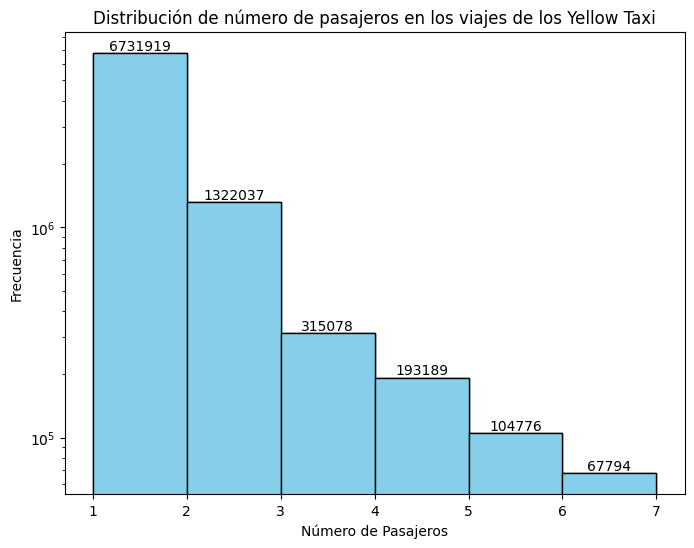

In [33]:
# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(yellow_taxi['passenger_count'], bins=range(1, 8), edgecolor='black', color='skyblue')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de número de pasajeros en los viajes de los Yellow Taxi')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Frecuencia')
plt.yscale('log')  # Escala logarítmica en el eje y

# Obtener las alturas de las barras
heights, bins, _ = plt.hist(yellow_taxi['passenger_count'], bins=range(1, 8), edgecolor='black', color='skyblue')

# Agregar las etiquetas de los valores en el centro de cada barra
for i, value in enumerate(heights):
    plt.text(bins[i] + 0.5, value, str(int(value)), ha='center', va='bottom')

# Mostrar el histograma
plt.show()

La variable `trip_distance` incluye valores atípicos, evidenciados por un viaje registrado de **161,726.1 millas**, media de **3.33 millas** y desviación estándar de **84.85 millas**. Para preservar la integridad estadística, se optará por excluir estos datos extremos que podrían sesgar el análisis.

In [34]:
a = yellow_taxi['trip_distance'].describe()
IQR = a['75%'] - a['25%']
RI = a['25%'] - 1.5 * IQR       # RAngo inferior
if RI < 0:
 RI = 0
RS = a['75%'] + 1.5 * IQR       # Rango superior

rango = list(range(int(round(RI,0)), int(round(RS,0)) + 1, 1))
yellow_taxi['trip_disntance_range'] = pd.cut(yellow_taxi['trip_distance'], bins=rango)
print(f"La variable 'Trip_distance' tiene valores atipicos de acuerdo a la siguiente información: \nMedia {a['mean']} \nDesviacion estandar {a['std']}\nValor Máximo {a['max']} \nValor mínimo {a['min']}")

La variable 'Trip_distance' tiene valores atipicos de acuerdo a la siguiente información: 
Media 3.3377390327099623 
Desviacion estandar 84.85824386677807
Valor Máximo 161726.1 
Valor mínimo 0.0


La distribución de las distancias recorridas indica que los viajes **menores de una milla** son frecuentes. Sin embargo, la **mayoría de los trayectos oscilan entre 1 y 2 millas**. Aunque hay una presencia notable de viajes dentro de este rango, aquellos que superan las 3 millas son relativamente raros.

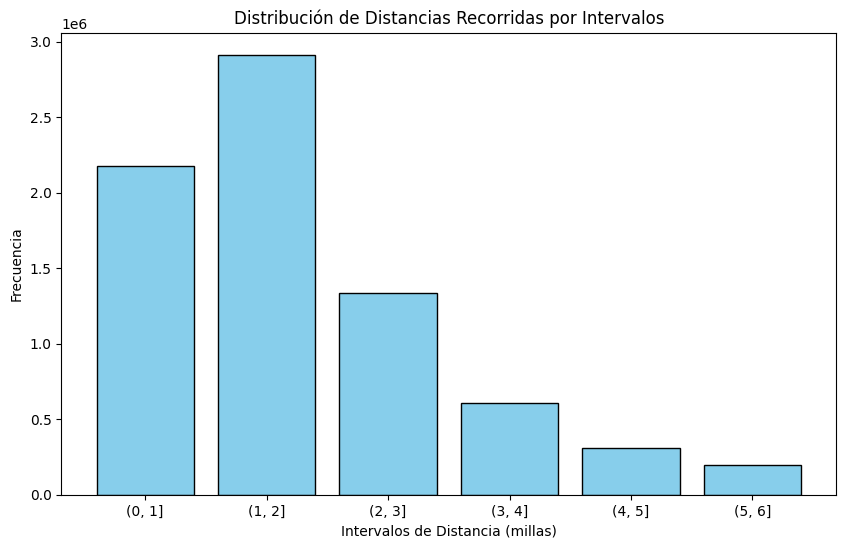

In [35]:
# Crear listas para los intervalos y sus frecuencias
intervals = [str(interval) for interval in yellow_taxi['trip_disntance_range'].value_counts().index]
frequencies = list(yellow_taxi['trip_disntance_range'].value_counts().values)

# Ordenar los intervalos y frecuencias para que coincidan
sorted_indices = sorted(range(len(intervals)), key=lambda k: intervals[k])
intervals = [intervals[i] for i in sorted_indices]
frequencies = [frequencies[i] for i in sorted_indices]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(intervals, frequencies, color='skyblue', edgecolor='black')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de Distancias Recorridas por Intervalos')
plt.xlabel('Intervalos de Distancia (millas)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


Importe total cobrado muestra algunos valores atipicos, como por ejemplo un valor **mínimo de -$1094.05**, **máximo de $5000**, una **desviación estándar de $23.56** y **media de $27.44**, por lo que se decide trabajar con un rango mas adecuado de valores

In [36]:
yellow_taxi['time'] = yellow_taxi['tpep_dropoff_datetime'] - yellow_taxi['tpep_pickup_datetime']
yellow_taxi['time'] = yellow_taxi['time'].apply(lambda x: int(x.total_seconds() // 60))

a = yellow_taxi['total_amount'].describe()
IQR = a['75%'] - a['25%']
RI = a['25%'] - 1.5 * IQR       # RAngo inferior
if RI < 0:
 RI = 0
RS = a['75%'] + 1.5 * IQR       # Rango superior
rango = list(range(int(round(RI,0)), int(round(RS,0)) + 1, 10))
yellow_taxi['total_amount_range'] = pd.cut(yellow_taxi['total_amount'], bins=rango)
print(f"La variable 'total_amount' tiene valores atipicos de acuerdo a la siguiente información: \nMedia {a['mean']} \nDesviacion estandar {a['std']}\nValor Máximo {a['max']} \nValor mínimo {a['min']}")
RI , RS

La variable 'total_amount' tiene valores atipicos de acuerdo a la siguiente información: 
Media 27.44126213228825 
Desviacion estandar 23.563278394868142
Valor Máximo 5000.0 
Valor mínimo -1094.05


(0, 51.03)

La grafica de importes cobrados muestra que la mayoría de los cobros están en el rango de 0 a 10 dólares, con una frecuencia cercana a los 4 millones. Los cobros de 10 a 20 dólares tienen aproximadamente la mitad de esa frecuencia, y los rangos más altos muestran frecuencias significativamente menores, siendo los cobros de 40 a 50 dólares los menos frecuentes. Esto indica que los importes cobrados más bajos son mucho más comunes que los más altos.

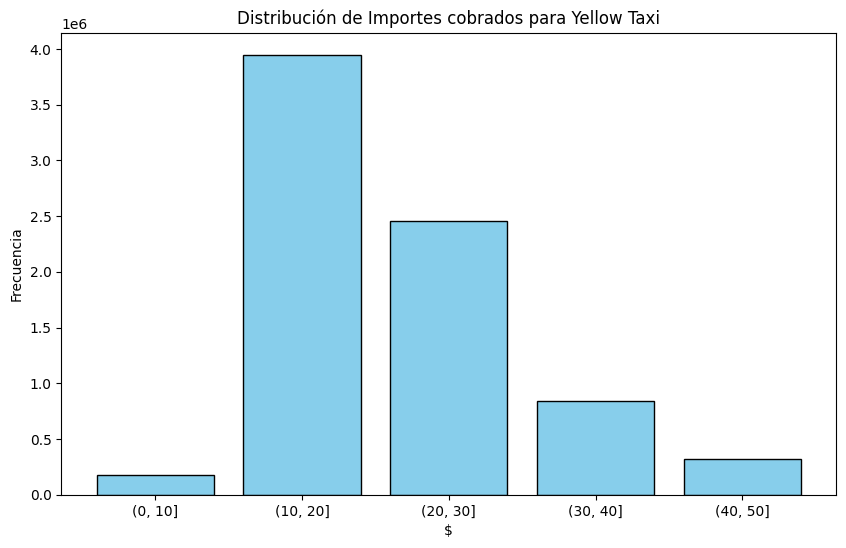

In [37]:
# Crear listas para los intervalos y sus frecuencias
intervals = [str(interval) for interval in yellow_taxi['total_amount_range'].value_counts().index]
frequencies = list(yellow_taxi['total_amount_range'].value_counts().values)

# Ordenar los intervalos y frecuencias para que coincidan
sorted_indices = sorted(range(len(intervals)), key=lambda k: intervals[k])
intervals = [intervals[i] for i in sorted_indices]
frequencies = [frequencies[i] for i in sorted_indices]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(intervals, frequencies, color='skyblue', edgecolor='black')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de Importes cobrados para Yellow Taxi')
plt.xlabel('$')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

El gráfico ilustra cómo la demanda de taxis amarillos fluctúa a lo largo del día durante un período de tres meses, con el punto más bajo cerca de las 5 HRS. y el pico más alto alrededor de las 18 HRS. Este análisis nos permite ver que el comportamiento del cliente.

In [4]:
yellow_taxi = pd.read_csv('../../Data/yellow_taxi_clean.csv')

In [11]:
yellow_taxi.sample()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,Airport_fee,trip_outside_zone,route,pickup_month,Duration,Duration_range,trip_disntance_range,time,total_amount_range,Hour_pickup
7374365,7694540,2,2024-02-14 22:35:36,2024-02-14 22:47:35,2.0,2.17,1.0,N,229,263,...,0.0,True,Sutton Place/Turtle Bay North --> Yorkville West,2024-02,11,"(10, 15]","(2, 3]",11,"(20, 30]",22


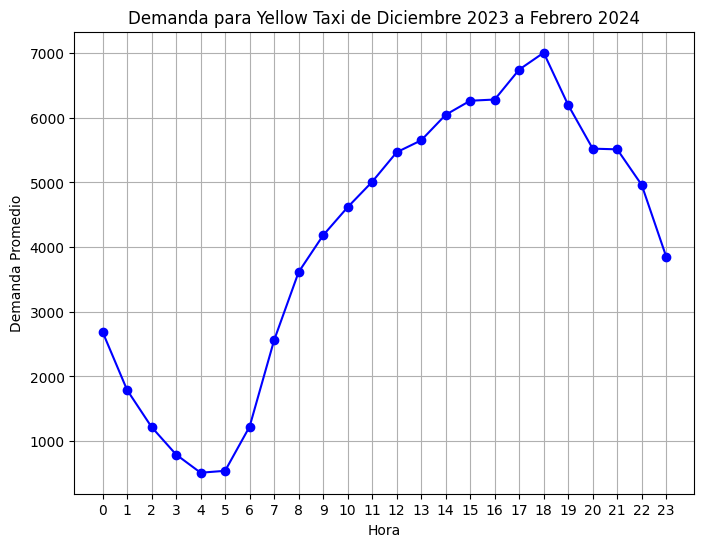

In [3]:
# yellow_taxi['Hour_pickup'] = yellow_taxi['tpep_pickup_datetime'].dt.hour
demanda = yellow_taxi.groupby('Hour_pickup')[['Hour_pickup']].count()
demanda['trip_per_hour'] = demanda['Hour_pickup'] / 90
demanda = demanda.rename(columns={'Hour_pickup': 'Trips'})

# Crear la gráfica de líneas
plt.figure(figsize=(8, 6))
plt.plot(demanda.index, demanda['trip_per_hour'], marker='o', linestyle='-', color='b')
plt.title('Demanda para Yellow Taxi de Diciembre 2023 a Febrero 2024')
plt.xlabel('Hora')
plt.ylabel('Demanda Promedio')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


### Transformaciones para la simulación

Creando tabla demanda por zona y por hora para NYC, utilizando el metodo M/M/1

DataFrame demanda con las siguientes variables:
- `Hour` Hora
- `Zone` Zona
- `Time4Service(customers/hour)` Velocidad de servicio medido en clientes / minuto.	
- `TimeArrival(customers/hour)` Velocidad de solcitudes de servicio medido en clientes / minuto


In [36]:
tiempo_atencion = yellow_taxi.groupby(['Hour_pickup','PULocationID'])['time'].mean()
tiempollegadas = yellow_taxi.groupby(['Hour_pickup','PULocationID'])['route'].count()
lista_demanda = []
for i , j in tiempo_atencion.index:
    hora = i
    zone = j
    ta = tiempo_atencion[i,j]
    tl = tiempollegadas[i,j]
    dato = {'Hour':hora,'Zone':zone,'Time4Service(customers/min)':tl / ta,'TimeArrival(customers/min)':tl / 60}
    lista_demanda.append(dato)
demandaXzona = pd.DataFrame(lista_demanda)
demandaXzona.to_csv('../../Data/demandaxzona.csv')

C:\Users\stdio\AppData\Local\Temp\ipykernel_18912\1350690389.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  dato = {'Hour':hora,'Zone':zone,'Time4Service(customers/min)':tl / ta,'TimeArrival(customers/min)':tl / 60}
C:\Users\stdio\AppData\Local\Temp\ipykernel_18912\1350690389.py:9: RuntimeWarning: invalid value encountered in double_scalars
  dato = {'Hour':hora,'Zone':zone,'Time4Service(customers/min)':tl / ta,'TimeArrival(customers/min)':tl / 60}


In [59]:
demandaXzona[demandaXzona['TimeArrival(customers/min)'] == 0]

,Hour,Zone,Time4Service(customers/min),TimeArrival(customers/min)
221,0,264,0.0,0.0
241,1,23,0.0,0.0
439,1,264,0.0,0.0
526,2,117,NaN,0.0
639,2,264,0.0,0.0
836,3,264,0.0,0.0
1059,4,264,0.0,0.0
1287,5,264,0.0,0.0
1518,6,264,0.0,0.0
1752,7,264,0.0,0.0


: 

In [39]:
data_simulation = yellow_taxi[['route','PULocationID','DOLocationID','trip_distance','RatecodeID','passenger_count','total_amount','time']]
data_simulation.to_csv('../../Data/Data_taxi_sim.csv')

# Green Taxi

### Descripción general de los datos Green Taxi

El siguiente analisis corresponde al conjunto de datos correspondiente a Green Taxi que abarca desde **diciembre de 2023 hasta febrero de 2024**. Este conjunto contiene **174,343 entradas**, dentro de las cuales algunas variables presentan valores nulos. Las variables afectadas incluyen `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type` y `congestion_surcharge`, sumando un total de **11,255 registros con nulos**. A pesar de esto, se ha decidido conservar estos registros debido a que contienen información significativa para el análisis. Es importante destacar que la variable `ehail_fee` se encontró completamente nula en el conjunto de datos.

In [40]:
green_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174343 entries, 0 to 174342
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               174343 non-null  int32         
 1   lpep_pickup_datetime   174343 non-null  datetime64[us]
 2   lpep_dropoff_datetime  174343 non-null  datetime64[us]
 3   store_and_fwd_flag     163088 non-null  object        
 4   RatecodeID             163088 non-null  float64       
 5   PULocationID           174343 non-null  int32         
 6   DOLocationID           174343 non-null  int32         
 7   passenger_count        163088 non-null  float64       
 8   trip_distance          174343 non-null  float64       
 9   fare_amount            174343 non-null  float64       
 10  extra                  174343 non-null  float64       
 11  mta_tax                174343 non-null  float64       
 12  tip_amount             174343 non-null  floa

In [41]:
green_taxi['passenger_count'].isna().value_counts()

passenger_count
False    163088
True      11255
Name: count, dtype: int64

## Análisis de Valores Atípicos en Green Taxi
En el conjunto de datos perteneciente a `Green Taxi` se encuentran anomalías las cuales pueden indicar situaciones inusuales o errores de entrada. Para la variable `trip_distance`, es importante aplicar métodos estadísticos para identificar y manejar estos valores extremos, como el uso de rangos intercuartílicos. En cuanto a `lpep_dropoff_datetime`, los viajes de 24 horas son inusuales y podrían ser eliminados o investigados más a fondo para entender su origen. Creamos la variable `Duration`ya que puede ayudar a visualizar la distribución de los tiempos de viaje y determinar si estos valores extremos siguen un patrón o son casos aislados. Finalmente, para `total_amount`, se deben considerar factores como tarifas adicionales o errores al ingresar los datos que pueden causar anomalías.

In [42]:
green_taxi.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,174343.000000,174343,174343,163088.000000,174343.000000,174343.000000,163088.000000,174343.000000,174343.000000,174343.000000,174343.000000,174343.000000,174343.000000,0.0,174343.000000,174343.000000,163088.000000,163078.000000,163088.000000
mean,1.871036,2024-01-14 02:22:12.008884,2024-01-14 02:41:17.015756,1.160766,96.370132,139.788136,1.302064,24.871931,17.649583,0.901996,0.572821,2.285072,0.210157,NaN,0.985576,23.158359,1.327351,1.034376,0.767353
min,1.000000,2023-11-24 21:03:34,2023-11-24 21:22:29,1.000000,1.000000,1.000000,0.000000,0.000000,-220.000000,-5.000000,-0.500000,-1.660000,-6.940000,NaN,-1.000000,-221.000000,1.000000,1.000000,-2.750000
25%,2.000000,2023-12-20 08:44:47,2023-12-20 09:08:33.500000,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.600000,1.000000,1.000000,0.000000
50%,2.000000,2024-01-13 18:00:58,2024-01-13 18:15:06,1.000000,75.000000,138.000000,1.000000,1.810000,13.500000,0.000000,0.500000,2.000000,0.000000,NaN,1.000000,18.640000,1.000000,1.000000,0.000000
75%,2.000000,2024-02-06 13:17:52.500000,2024-02-06 13:36:23.500000,1.000000,116.000000,223.000000,1.000000,3.170000,20.000000,2.500000,0.500000,3.550000,0.000000,NaN,1.000000,27.150000,2.000000,1.000000,2.750000
max,2.000000,2024-02-29 23:56:40,2024-03-01 19:56:23,99.000000,265.000000,265.000000,9.000000,201421.680000,1618.600000,10.250000,4.250000,222.000000,46.760000,NaN,1.000000,1622.600000,5.000000,2.000000,2.750000
std,0.335161,NaN,NaN,1.081223,57.977751,76.547649,0.955273,1125.172894,18.547666,1.354883,0.383186,3.035014,1.258187,NaN,0.137381,19.980554,0.500974,0.182194,1.233187


## Variables Green Taxi
### Variables cualitativas Green Taxi

1. `VendorID`. Identificador del proveedor del Taxicab Technology Service Provider (TPEP), el cual puede presentar solo dos ID´s:
- 1= Creative Mobile Technologies, LLC
- 2= VeriFone Inc.

2. `Store_and_fwd_flag`. Esta variable indica si el registro se almaceno en el vehiculo para posteriormente enviarse al servidor. Debido a conectividad. Puede tomar los Valores (Y= Almacenado y posterior envio, N= No almacenado, se envio al servidor)

3. `RateCodeID`. Identificador de tarifa vigente al finalizar el viaje. Puede tomar los siguientes valores:
- 1=Tarifa estándar
- 2=JFK
- 3=Newark
- 4=Nassau o Westchester
- 5=Tarifa negociada
- 6=Tarifa grupal

4. `PULocationID`. Zona dónde se inicio el Taximetro, las zonas se segmentan con valores enteros que van del 1 al 265, (consulte el DataFrame `zonas`)

5. `DOLocationID`. Zona dónde se finalizo el Taximetro (Consulte DataFrame Zonas)

6. `payment_type`. Tipo de pago, los valores pueden ser:
- 1= Tarjeta de crédito
- 2= Efectivo
- 3= Sin cargo
- 4= Disputa
- 5= Desconocido
- 6= Viaje anulado

7. `trip_type`. Indica si el viaje fue abordado en la calle o un despacho que se asigna automáticamente en función de la tarifa medida en uso, pero que puede ser alterado por el conductor. Tiene 2 posibles valores
- 1= Viaje de calle
- 2= Viaje de despacho

## Algunas distribuciones cualitativas de los Green Taxi
El principal proveedor de TPEP es Veriphone Inc al igual que en los Yellow Taxi, ya que presta sus servicios para proveer el 87.1% de los datos

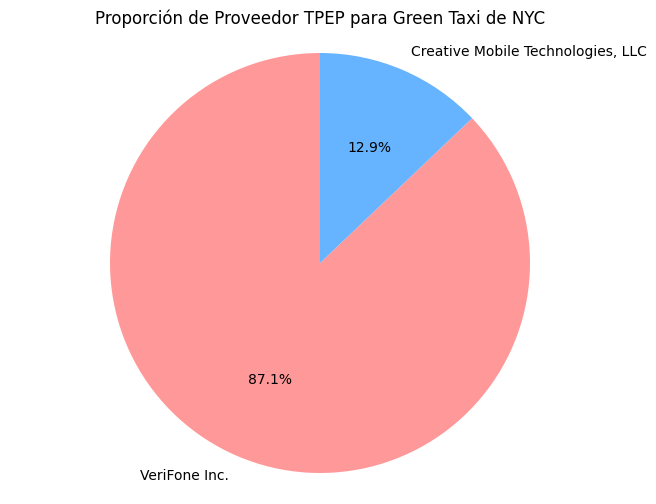

In [43]:
# Datos
vendor = {1:'Creative Mobile Technologies, LLC', 2:'VeriFone Inc.'}
vendor_counts = list(green_taxi['VendorID'].value_counts())
labels = ['VeriFone Inc.', 'Creative Mobile Technologies, LLC']
colors = ['#FF9999', '#66B3FF']

# Crear la gráfica circular
plt.figure(figsize=(8, 6))
plt.pie(vendor_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Proveedor TPEP para Green Taxi de NYC')
plt.axis('equal')  # Aspecto igual para que sea un círculo

# Mostrar la gráfica
plt.show()


Únicamente el 0.2% de los datos correspondientes a los Green Taxi son almacenados para enviarse posteriormente, lo que nos permite ver la posibilidad de hacer uso de ellos en para un seguimiento en tiempo real

In [44]:
porcentaje = list(green_taxi['store_and_fwd_flag'].value_counts())[1]/(list(green_taxi['store_and_fwd_flag'].value_counts())[0]+list(green_taxi['store_and_fwd_flag'].value_counts())[1])
print(f"La proporcion de registros almacenados y enviados posteriormente es del {round(porcentaje*100,2)}%")

La proporcion de registros almacenados y enviados posteriormente es del 0.21%


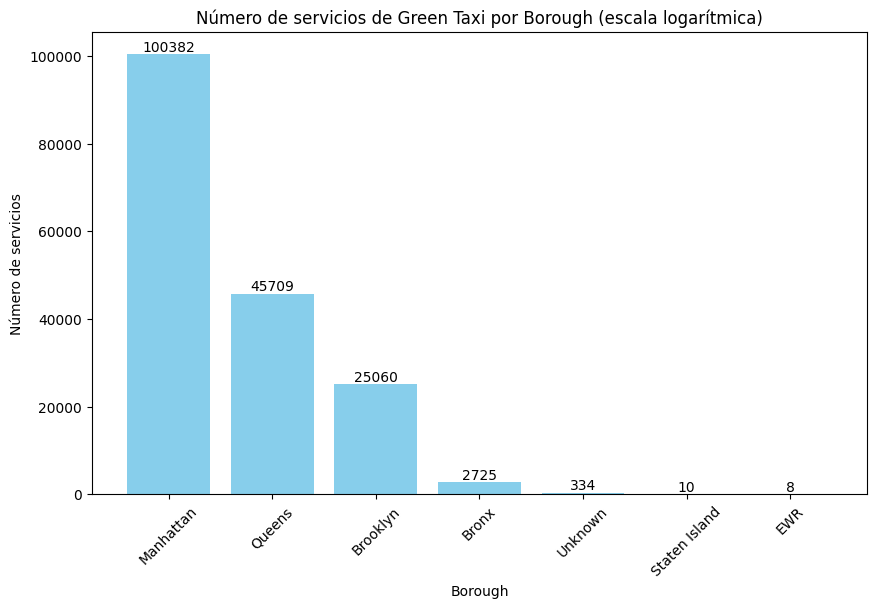

In [45]:
# Creando DF que relaciona Zona, Borough, Zona de Servicio y el número de servicios.
ZIG = {'LocationID':list(green_taxi['PULocationID'].value_counts().index),
      'Número de servicios':list(green_taxi['PULocationID'].value_counts())}
ZonaInicioG = pd.DataFrame(ZIG)

ZonaInicioG = pd.merge(ZonaInicioG,zonas,on='LocationID', how='inner')

borough_servicesG = ZonaInicioG.groupby('Borough')['Número de servicios'].sum().reset_index()

# Ordenar los datos para una mejor visualización
borough_services_sortedG = borough_servicesG.sort_values('Número de servicios', ascending=False)

# Crear el histograma con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))
plt.bar(borough_services_sortedG['Borough'], borough_services_sortedG['Número de servicios'], color='skyblue')
# plt.yscale('log')  # Escala logarítmica en el eje y

# Mostrar las etiquetas en las barras
for i, value in enumerate(borough_services_sortedG['Número de servicios'].values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Número de servicios de Green Taxi por Borough (escala logarítmica)')
plt.xlabel('Borough')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el histograma
plt.show()


**Tarifa Estándar Predomina**: La 'Tarifa estándar' es la más común, con una frecuencia significativamente mayor que las demás categorías. **Otras Categorías Menos Frecuentes**: Las tarifas como 'JFK', 'Newark', y 'Tarifa grupal' tienen frecuencias mucho menores, lo que indica que son menos comunes.

En este dataset se presentan 10 casos de una tarifa no documentada, pero en esta ocasión en una minoria de los datos


In [46]:
green_taxi['RatecodeID'].value_counts()

RatecodeID
1.0     156352
5.0       6038
2.0        452
4.0        157
3.0         77
99.0        10
6.0          2
Name: count, dtype: int64

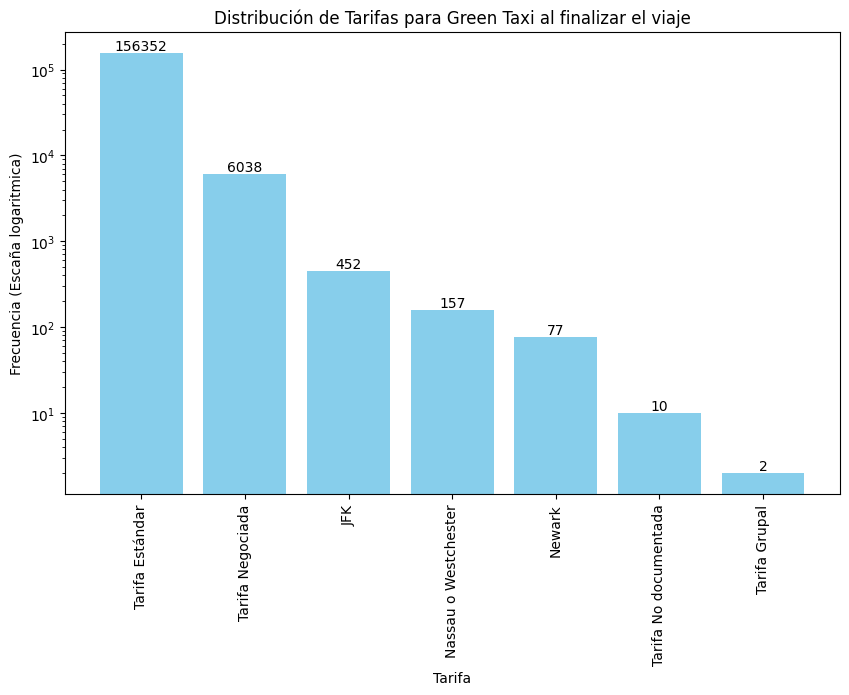

In [47]:
ratecode_counts = green_taxi['RatecodeID'].value_counts()
RCID = {1:'Tarifa Estándar',2:'JFK',3:'Newark',4:'Nassau o Westchester',5:'Tarifa Negociada',6:'Tarifa Grupal',99:'Tarifa No documentada'}
# Ahora, crearemos una lista de etiquetas basadas en el diccionario RCID para las barras del histograma.
labels = [RCID[id] if id in RCID else 'Other' for id in ratecode_counts.index]

# Crear el histograma con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))
plt.bar(labels, ratecode_counts.values, color='skyblue')
plt.yscale('log')  # Escala logarítmica en el eje y

# Añadir título y etiquetas
plt.title('Distribución de Tarifas para Green Taxi al finalizar el viaje')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia (Escaña logaritmica)')
plt.xticks(rotation = 90)

# Mostrar las etiquetas en las barras
for i, value in enumerate(ratecode_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostrar el histograma
plt.show()


El diagrama **"20 rutas más solicitadas para los Green Taxi en NYC"** muestra que la ruta más popular es de **East Harlem North a East Harlem south**, lo que indica una alta demanda de viajes entre estos dos puntos.

In [48]:
green_taxi['trip_outside_zone'] = green_taxi['PULocationID'] != green_taxi['DOLocationID']
green_taxi['route'] = green_taxi['PULocationID'].apply(idzone2zone) +' --> '+ green_taxi['DOLocationID'].apply(idzone2zone)


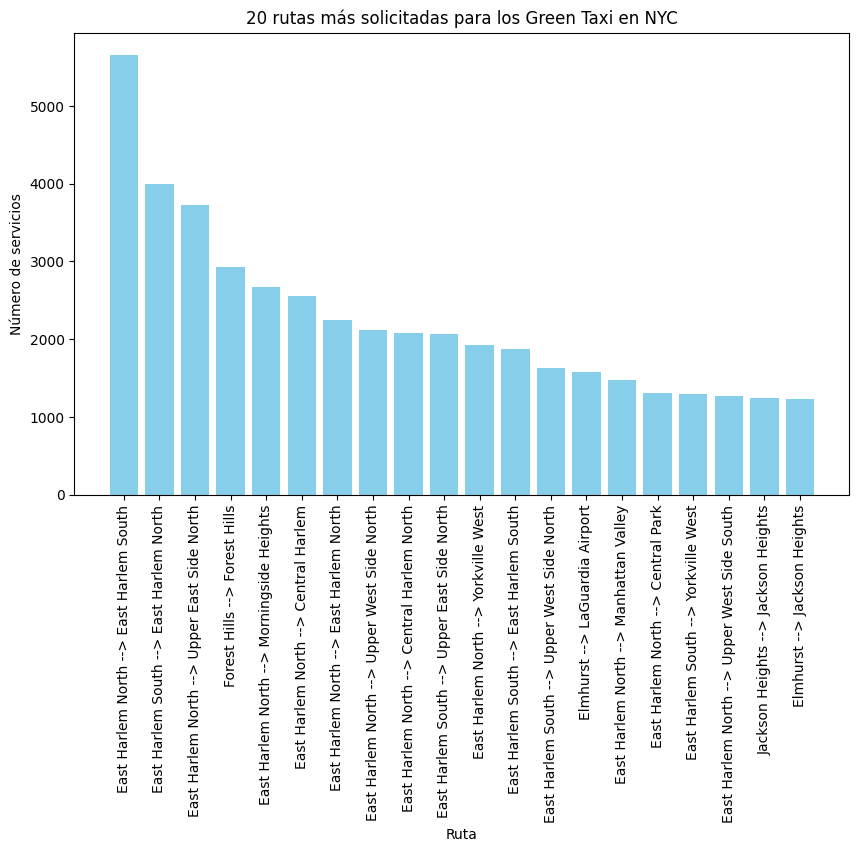

In [49]:
# Cantidad de rutas a mostrar en el gráfico
n = 20
rutas = green_taxi.groupby('route')['route'].count().sort_values(ascending=False).head(n)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(list(rutas.index), list(rutas), color='skyblue')

# Añadir título y etiquetas
plt.title(f'{n} rutas más solicitadas para los Green Taxi en NYC')
plt.xlabel('Ruta')
plt.ylabel('Número de servicios')

# Girar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Mostrar el histograma
plt.show()

La **tarjeta de crédito** es el método de pago más utilizado con **111,786** transacciones, mientras que el **efectivo** es significativamente menor con **49,640** transacciones.

Este gráfico destaca la preferencia dominante por el pago con tarjeta de crédito sobre el efectivo y otros métodos entre los usuarios de Green Taxis.

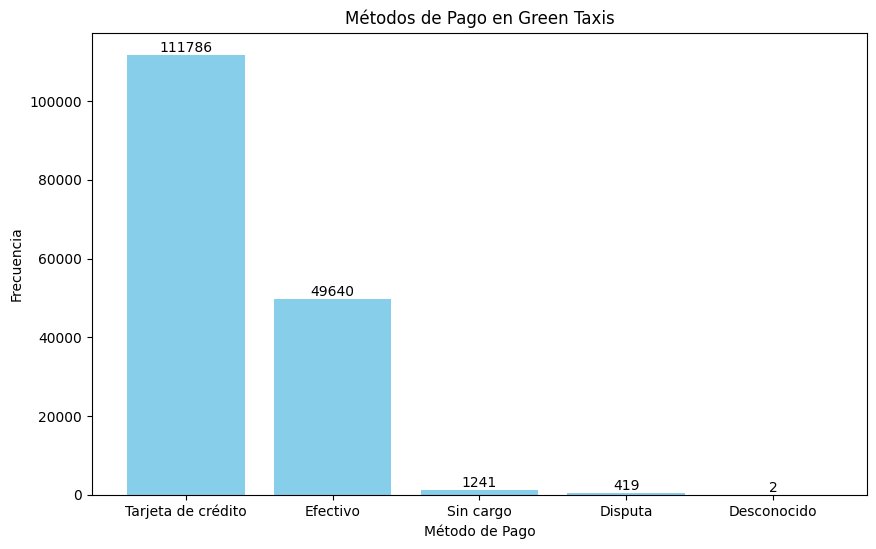

In [50]:
payment_counts = green_taxi['payment_type'].value_counts()
payment_method = {1:'Tarjeta de crédito',2:'Efectivo',3:'Sin cargo',4:'Disputa',5:'Desconocido',6:'Viaje anulado'}

# Crear una lista de nombres de métodos de pago basada en el diccionario 'payment_method'
payment_names = [payment_method[payment_id] if payment_id in payment_method else 'Desconocido'
                 for payment_id in payment_counts.index]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(payment_names, payment_counts.values, color='skyblue')

# Mostrar las etiquetas en las barras
for i, value in enumerate(payment_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Añadir título y etiquetas a los ejes
plt.title('Métodos de Pago en Green Taxis')
plt.xlabel('Método de Pago')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


## Variables cuantitativas Green Taxi

1. `lpep_pickup_datetime`. Fecha y hora en la que se inicia el Taxímetro
2. `lpep_dropoff_datetime`. Fecha y hora en la que se termina el servicio.
3. `passenger_count`. Número de pasajeros, el operador ingresa este dato manualmente
4. `trip_distance`. Distancia del servicio en millas
5. `fare_amount`. Tarifa de tiempo y distancia calculada por el Taxímetro
6. `extra`. Extras y recargos varios. Solo incluye los cargos por hora pico ($0.50) y noche ($1)
7. `mta_tax`. Impuesto MTA de $0.50 que se activa automáticamente en función de la tarifa medida en uso.
8. `tip_amount`. Propina. Unicamente si el método de pago es con tarjeta de crédito
9. `tolls_amount`. Importe total de todos los peajes pagados en viaje.
10. `improvement_surcharge`. Cargo por mejora de $0.30
11. `total_amount`. Importe total cobrado. No se incluyen propinas en efectivo.
12. `congestion_surcharge`. Recargo total por congestión del Estado de Nueva York.

## Algunas distribuciones cuantitativas de Green Taxi
El gráfico muestra la "Distribución de servicios de Green Taxi por Mes" en NYC, con barras para el periodo comprendido entre diciembre del 2023 a febrero del 2024. La demanda disminuye notablemente de en enero y febrero, siendo diciembre el mes con más servicios registrados, reflejando una distribución con tendencia a comportarse uniformemente.

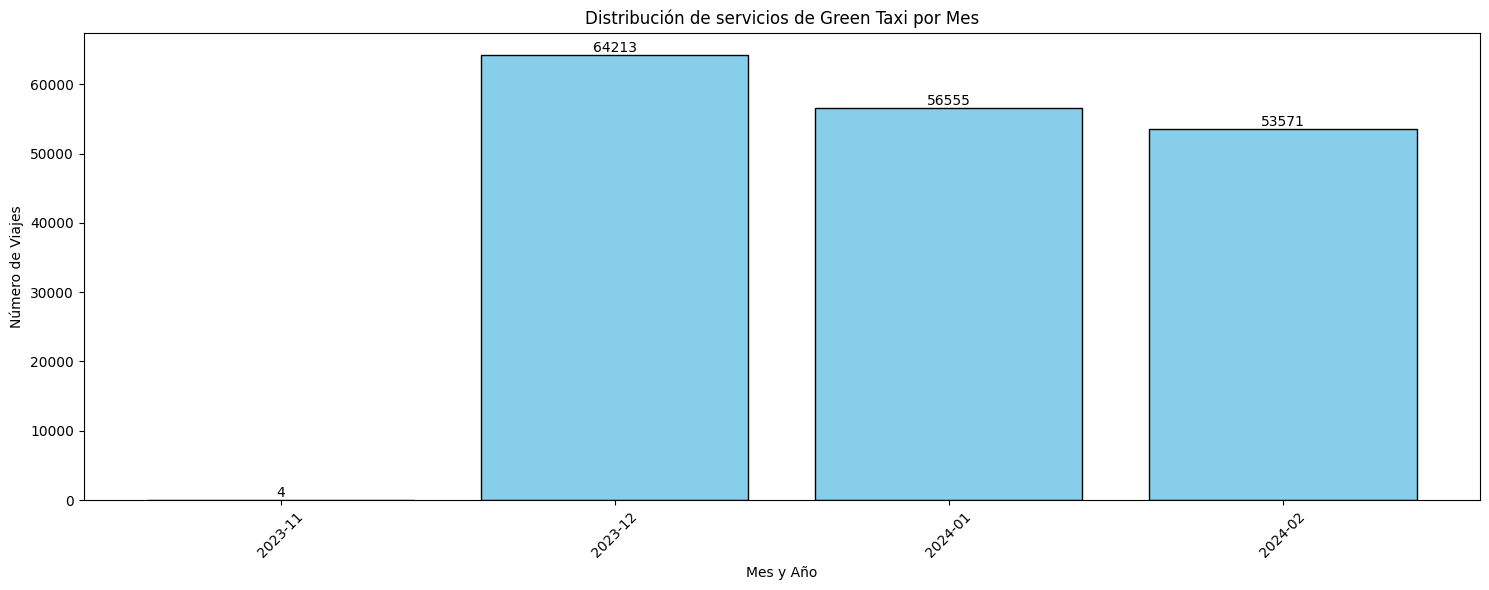

In [51]:
green_taxi['lpep_pickup_datetime'] = pd.to_datetime(green_taxi['lpep_pickup_datetime'])

# Extraer el mes y el año de la fecha de recogida
green_taxi['pickup_month'] = green_taxi['lpep_pickup_datetime'].dt.strftime('%Y-%m')

# Contar la cantidad de recogidas por cada mes y año
monthly_pickups = green_taxi['pickup_month'].value_counts().sort_index()

# Crear el histograma
plt.figure(figsize=(15, 6))
plt.bar(monthly_pickups.index, monthly_pickups.values, color='skyblue', edgecolor='black')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de servicios de Green Taxi por Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45) # Rotar las etiquetas para mejor visualización
# plt.yscale('log')  # Escala logarítmica en el eje y

# Mostrar las etiquetas en las barras
for i, value in enumerate(monthly_pickups.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Mostrar el histograma
plt.tight_layout() # Ajustar la disposición para evitar la superposición de etiquetas
plt.show()

La variable `lpep_dropoff_datetime` muestra ciertos valores atipicos de forma indirecta, ya que si calculamos la duracion del viaje encontramos valores atipicos

In [52]:
green_taxi['Duration'] = green_taxi['lpep_dropoff_datetime'] - green_taxi['lpep_pickup_datetime']
green_taxi['Duration'] = green_taxi['Duration'].apply(lambda x: int(x.total_seconds() // 60))

In [53]:
statistics = green_taxi['Duration'].describe()
IQR = statistics['75%'] - statistics['25%']
RI = statistics['25%'] - 1.5 * IQR       # RAngo inferior
if RI < 0:
    RI = 0
RS = statistics['75%'] + 1.5 * IQR       # Rango superior
rango = list(range(int(round(RI,0)), int(round(RS,0)) + 1, 5))
green_taxi['Duration_range'] = pd.cut(green_taxi['Duration'], bins=rango)
print(f"La variable 'total_amount' tiene valores atipicos de acuerdo a la siguiente información: \nMedia {statistics['mean']} \nDesviacion estandar {statistics['std']}\nValor Máximo {statistics['max']} \nValor mínimo {statistics['min']}")
print(RI , RS)

La variable 'total_amount' tiene valores atipicos de acuerdo a la siguiente información: 
Media 18.63033216131419 
Desviacion estandar 77.52981332635751
Valor Máximo 1439.0 
Valor mínimo 0.0
0 32.0


El gráfico muestra que la frecuencia de viajes más cortos (**'0-5'** y **'5-10'** minutos) tienden a ser los mas solicitados, lo que indica que la mayoría de los viajes son breves. La distribución es **sesgada a la derecha**, ya que hay una alta frecuencia en los rangos de duración más cortos y disminuye a medida que aumenta la duración.

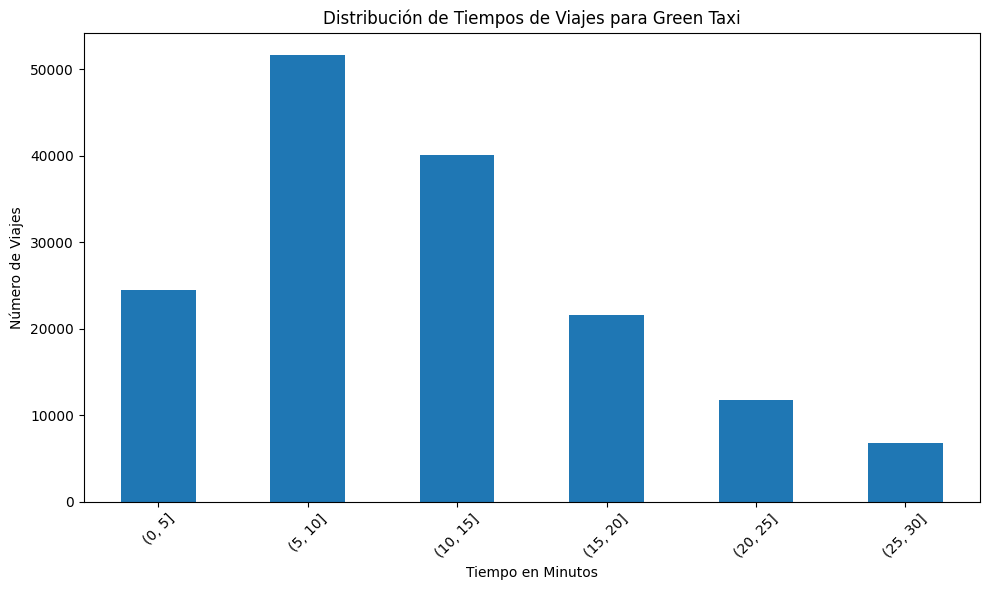

In [54]:
duration_counts = green_taxi['Duration_range'].value_counts().sort_index()

# Ahora creamos la gráfica de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura a tus necesidades
duration_counts.plot(kind='bar')  # Crea una gráfica de barras
plt.title('Distribución de Tiempos de Viajes para Green Taxi')  # Título de la gráfica
plt.xlabel('Tiempo en Minutos')  # Etiqueta para el eje X
plt.ylabel('Número de Viajes')  # Etiqueta para el eje Y
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor visualización
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()  # Muestra la gráfica


El siguiente Grafico muestra que la mayoria de los viajes son de un solo pasajero, mientras que los viajes con más de un pasajero son poco comunes

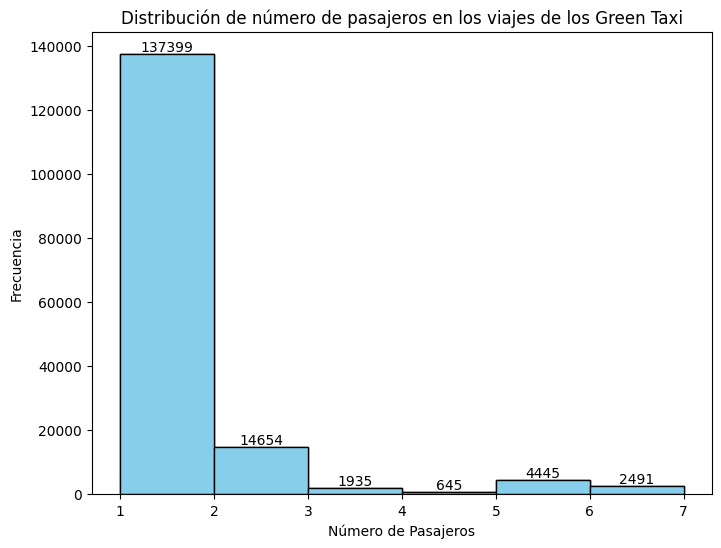

In [55]:
# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(green_taxi['passenger_count'], bins=range(1, 8), edgecolor='black', color='skyblue')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de número de pasajeros en los viajes de los Green Taxi')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Frecuencia')
# plt.yscale('log')  # Escala logarítmica en el eje y

# Obtener las alturas de las barras
heights, bins, _ = plt.hist(green_taxi['passenger_count'], bins=range(1, 8), edgecolor='black', color='skyblue')

# Agregar las etiquetas de los valores en el centro de cada barra
for i, value in enumerate(heights):
    plt.text(bins[i] + 0.5, value, str(int(value)), ha='center', va='bottom')

# Mostrar el histograma
plt.show()

Las distancias recorridas para los Yellow Taxi pueden encontrarse outliers los cuales pueden sesgar la data.

Se puede notar que la mayoria de los graficos son de **una a dos millas**, mientras que los viajes mayores de 3 millas son poco solicitados

In [56]:
a = green_taxi['trip_distance'].describe()
IQR = a['75%'] - a['25%']
RI = a['25%'] - 1.5 * IQR       # RAngo inferior
if RI < 0:
 RI = 0
RS = a['75%'] + 1.5 * IQR       # Rango superior

rango = list(range(int(round(RI,0)), int(round(RS,0)) + 1, 1))
green_taxi['trip_disntance_range'] = pd.cut(green_taxi['trip_distance'], bins=rango)
print(f"La variable 'Trip_distance' tiene valores atipicos de acuerdo a la siguiente información: \nMedia {a['mean']} \nDesviacion estandar {a['std']}\nValor Máximo {a['max']} \nValor mínimo {a['min']}")

La variable 'Trip_distance' tiene valores atipicos de acuerdo a la siguiente información: 
Media 24.871931021033248 
Desviacion estandar 1125.1728940649841
Valor Máximo 201421.68 
Valor mínimo 0.0


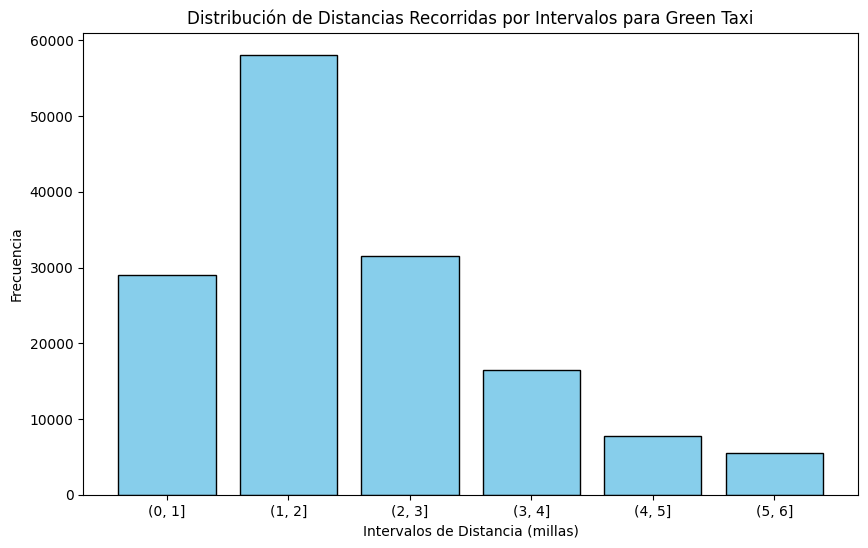

In [57]:
# Crear listas para los intervalos y sus frecuencias
intervals = [str(interval) for interval in green_taxi['trip_disntance_range'].value_counts().index]
frequencies = list(green_taxi['trip_disntance_range'].value_counts().values)

# Ordenar los intervalos y frecuencias para que coincidan
sorted_indices = sorted(range(len(intervals)), key=lambda k: intervals[k])
intervals = [intervals[i] for i in sorted_indices]
frequencies = [frequencies[i] for i in sorted_indices]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(intervals, frequencies, color='skyblue', edgecolor='black')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de Distancias Recorridas por Intervalos para Green Taxi')
plt.xlabel('Intervalos de Distancia (millas)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


Los importe cobrados en cada servicio muestran valores atipicos, dada esa situación se procede a trabajar con un rango de datos que va desde los $0 a ~$47

In [58]:
a = green_taxi['total_amount'].describe()
IQR = a['75%'] - a['25%']
RI = a['25%'] - 1.5 * IQR       # RAngo inferior
if RI < 0:
 RI = 0
RS = a['75%'] + 1.5 * IQR       # Rango superior
rango = list(range(int(round(RI,0)), int(round(RS + 10,0)) + 1, 10))
green_taxi['total_amount_range'] = pd.cut(green_taxi['total_amount'], bins=rango)
print(f"La variable 'total_amount' tiene valores atipicos de acuerdo a la siguiente información: \nMedia {a['mean']} \nDesviacion estandar {a['std']}\nValor Máximo {a['max']} \nValor mínimo {a['min']}")
RI , RS

La variable 'total_amount' tiene valores atipicos de acuerdo a la siguiente información: 
Media 23.158359211439517 
Desviacion estandar 19.980553660082133
Valor Máximo 1622.6 
Valor mínimo -221.0


(0, 47.474999999999994)

La mayoria de los importes más comunes son entre **$10 a $20 dolares** y en segunda instancia sera entre **$20 y $30 dolares**.

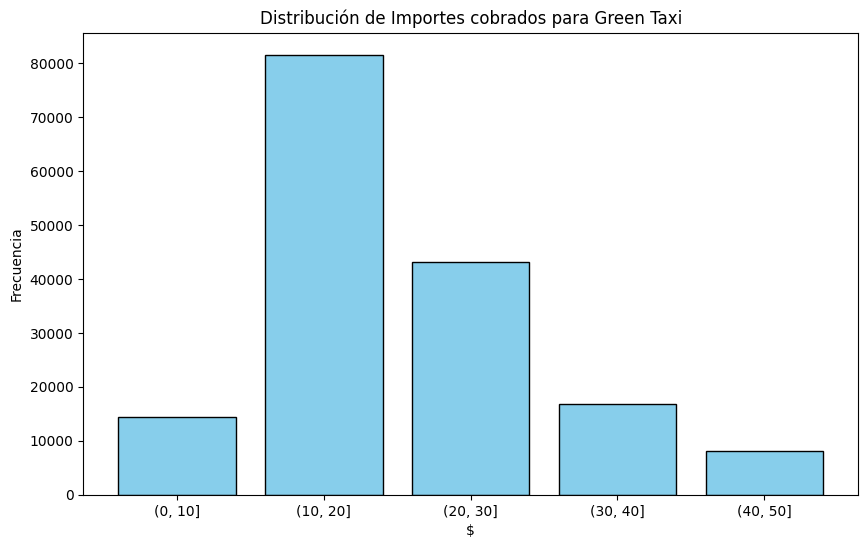

In [59]:
# Crear listas para los intervalos y sus frecuencias
intervals = [str(interval) for interval in green_taxi['total_amount_range'].value_counts().index]
frequencies = list(green_taxi['total_amount_range'].value_counts().values)

# Ordenar los intervalos y frecuencias para que coincidan
sorted_indices = sorted(range(len(intervals)), key=lambda k: intervals[k])
intervals = [intervals[i] for i in sorted_indices]
frequencies = [frequencies[i] for i in sorted_indices]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(intervals, frequencies, color='skyblue', edgecolor='black')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de Importes cobrados para Green Taxi')
plt.xlabel('$')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

La demanda de Green Taxis es muy similar a la de los Yellow Taxi en donde podemos notar que la máxima demanda se presenta alrededor de las 18 hrs y la demanda mínima es a las 5 hrs.

Es notorio que la demanda de los Green Taxis es mucho menor en comparación con los Yellow Taxi

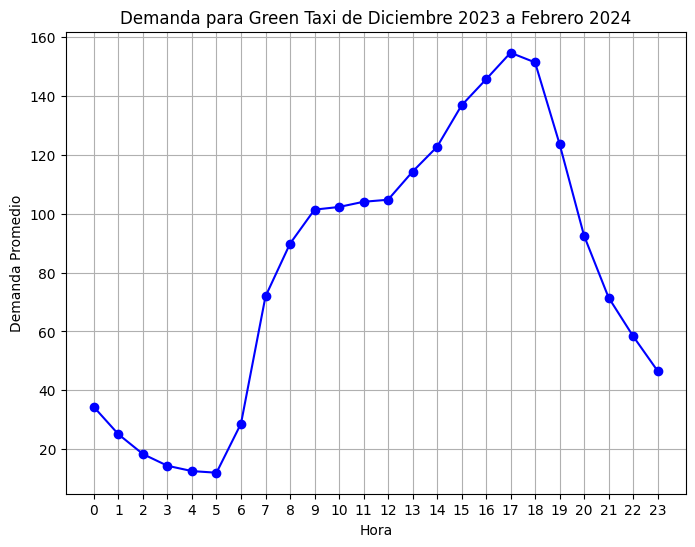

In [60]:
green_taxi['Hour_pickup'] = green_taxi['lpep_pickup_datetime'].dt.hour
demanda = green_taxi.groupby('Hour_pickup')[['Hour_pickup']].count()
demanda['trip_per_hour'] = demanda['Hour_pickup'] / 90
demanda = demanda.rename(columns={'Hour_pickup': 'Trips'})

# Crear la gráfica de líneas
plt.figure(figsize=(8, 6))
plt.plot(demanda.index, demanda['trip_per_hour'], marker='o', linestyle='-', color='b')
plt.title('Demanda para Green Taxi de Diciembre 2023 a Febrero 2024')
plt.xlabel('Hora')
plt.ylabel('Demanda Promedio')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

In [61]:
yellow_taxi.to_csv('../../Data/yellow_taxi_clean.csv')
green_taxi.to_csv('../../Data/green_taxi_clean.csv')
